In [1]:
# import os
import sys
import time
import math
import numpy
import warnings
import struct
import binascii
import pandas as pd
import numpy as np
import pickle
import h5py
import tensorflow as tf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline

In [2]:
from datetime import datetime
from sklearn import preprocessing
from tqdm import tqdm,tqdm_notebook
from IPython.display import display, clear_output
from matplotlib.image import imread # read images
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks
from numpy.polynomial.polynomial import polyfit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation,concatenate
from tensorflow.keras.optimizers import Adam #optimizer
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.python.client import device_lib
from sklearn.preprocessing import MinMaxScaler # normalize and scale data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [3]:
#Checking out all of the relevant information in this h5 file
f=h5py.File('/home/c479r989/research_repo/data-preprocess/ND_MC_Nominal_Files_FHC_mominkhan/neardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00010582_s17_c005_R19-11-18-prod5reco.x_v1_20191024_022032_sim.h5caf.h5')
f.keys()    
#list(f.keys()) 
#print(f)

<KeysViewHDF5 ['MetaData', 'neutrino', 'neutrino.beam', 'neutrino.genVersion', 'neutrino.michel', 'neutrino.prim', 'neutrino.prim.daughterEnergies', 'neutrino.prim.daughterlist', 'neutrino.rwgt.genie', 'neutrino.rwgt.ppfx', 'neutrino.rwgt.ppfx.vuniv', 'rec.energy.nue', 'rec.energy.nue.lid', 'rec.energy.numu', 'rec.energy.numu.bpfenergy', 'rec.energy.numu.hadclust', 'rec.energy.numu.mc', 'rec.hdr', 'rec.mc', 'rec.mc.allcosmics', 'rec.mc.allcosmics.michel', 'rec.mc.allnus', 'rec.mc.allnus.beam', 'rec.mc.allnus.genVersion', 'rec.mc.allnus.michel', 'rec.mc.allnus.prim', 'rec.mc.allnus.prim.daughterEnergies', 'rec.mc.allnus.prim.daughterlist', 'rec.mc.allnus.rwgt.genie', 'rec.mc.allnus.rwgt.ppfx', 'rec.mc.allnus.rwgt.ppfx.vuniv', 'rec.mc.cosmic', 'rec.mc.cosmic.michel', 'rec.mc.global', 'rec.mc.nu', 'rec.mc.nu.beam', 'rec.mc.nu.genVersion', 'rec.mc.nu.michel', 'rec.mc.nu.prim', 'rec.mc.nu.prim.daughterEnergies', 'rec.mc.nu.prim.daughterlist', 'rec.mc.nu.rwgt.genie', 'rec.mc.nu.rwgt.ppfx', '

In [4]:
#Search the keys for any specific phrase
for item in f.keys():
    #if 'vtx' in list(f[item]):
        #print(item)
    for thing in list(f[item]):
        if 'pdg' in thing:
            w=f[item][thing][:]
            print('item is', item)
            print('thing is', thing)
            print(len(w))


#list(f['rec.mc.nu.prim'])


#list(f['rec.vtx.hough'])

item is neutrino
thing is pdg
17555
item is neutrino
thing is pdgorig
17555
item is neutrino.prim
thing is pdg
143476
item is rec.mc.allcosmics
thing is pdg
0
item is rec.mc.allnus
thing is pdg
5734
item is rec.mc.allnus
thing is pdgorig
5734
item is rec.mc.allnus.prim
thing is pdg
44766
item is rec.mc.cosmic
thing is pdg
0
item is rec.mc.nu
thing is pdg
4679
item is rec.mc.nu
thing is pdgorig
4679
item is rec.mc.nu.prim
thing is pdg
35612
item is rec.me.slc.truth
thing is motherpdg
1691
item is rec.me.slc.truth
thing is pdg
1691
item is rec.me.trkbpf.truth
thing is motherpdg
0
item is rec.me.trkbpf.truth
thing is pdg
0
item is rec.me.trkcosmic.truth
thing is motherpdg
0
item is rec.me.trkcosmic.truth
thing is pdg
0
item is rec.me.trkdiscrete.truth
thing is motherpdg
0
item is rec.me.trkdiscrete.truth
thing is pdg
0
item is rec.me.trkkalman.truth
thing is motherpdg
120
item is rec.me.trkkalman.truth
thing is pdg
120
item is rec.sel.bpfid
thing is pdg
5310
item is rec.sel.cosrej
thing i

item is rec.trk.window.tracks.mrdif.lid.truth
thing is pdg
0
item is rec.trk.window.tracks.mrdif.lid.truthXView
thing is motherpdg
0
item is rec.trk.window.tracks.mrdif.lid.truthXView
thing is pdg
0
item is rec.trk.window.tracks.mrdif.lid.truthYView
thing is motherpdg
0
item is rec.trk.window.tracks.mrdif.lid.truthYView
thing is pdg
0
item is rec.trk.window.tracks.mrdif.truth
thing is motherpdg
0
item is rec.trk.window.tracks.mrdif.truth
thing is pdg
0
item is rec.trk.window.tracks.mrdif.truthXView
thing is motherpdg
0
item is rec.trk.window.tracks.mrdif.truthXView
thing is pdg
0
item is rec.trk.window.tracks.mrdif.truthYView
thing is motherpdg
0
item is rec.trk.window.tracks.mrdif.truthYView
thing is pdg
0
item is rec.trk.window.tracks.truth
thing is motherpdg
4225
item is rec.trk.window.tracks.truth
thing is pdg
4225
item is rec.trk.window.tracks.truthXView
thing is motherpdg
4225
item is rec.trk.window.tracks.truthXView
thing is pdg
4225
item is rec.trk.window.tracks.truthYView
thin

item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.lid.truth
thing is motherpdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.lid.truth
thing is pdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.lid.truthXView
thing is motherpdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.lid.truthXView
thing is pdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.lid.truthYView
thing is motherpdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.lid.truthYView
thing is pdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.truth
thing is motherpdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.truth
thing is pdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.truthXView
thing is motherpdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.truthXView
thing is pdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.truthYView
thing is motherpdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrbrem.truthYView
thing is pdg
0
item is rec.vtx.hough.fuzzyk.png.bpf.pion.mrdif.lid.truth
th

In [5]:
#list(f['rec.vtx.hough'])
#w=f['rec.vtx.hough']['vtx.x'][:]
#print(w)

w=f['neutrino.prim']['pdg'][:]
print(w)
print('number of elements is', len(w))

[[  13]
 [2112]
 [2112]
 ...
 [  13]
 [2112]
 [ 211]]
number of elements is 143476


In [39]:


pdg=w
idx=0
event=0
#Defining an array that contains the final state pdg information

#finalstate=f['rec.mc.nu.prim']['pdg'][0]
finalstate=np.append(finalstate,pdg[idx][event][0])
#print(len(finalstate))
print(finalstate)


IndexError: invalid index to scalar variable.

In [7]:
#Converting the array into a one dimensional list
newfinalstate=numpy.zeros(len(finalstate))
for a in range(len(finalstate)):
    newfinalstate[a]=finalstate[a,0]
    
print(newfinalstate)

[ -13. 2112. 2212. ... 2212.  211. 2212.]


In [8]:
#Simple counter to tell you how many of a certain particle there is by pdg number
#count=numpy.zeros(len(newfinalstate))
count=0
for pdgnumber in newfinalstate:
    if pdgnumber==111:
        count=count+1
    else:
        continue
            
print(count)

3295


In [11]:
#Define a function that tells you the unique elements in an list by converting it to a set, and then putting that back into a list
def spread(array):
    w=set(array)
    neww=list(w)
    return neww
    
S=spread(newfinalstate)
#print(S)

In [12]:
#Creating a list that will count the number of events for each unique pdg number and put them in order 
countarray=numpy.zeros(len(S))
for a in range(len(S)):
    for pdgnumber in newfinalstate:
        if pdgnumber==S[a]:
            countarray[a]=countarray[a]+1
        else:
            continue
            
print(countarray)  

[2.100e+01 6.300e+01 2.000e+01 3.884e+03 5.570e+02 1.597e+03 4.800e+01
 8.000e+00 1.007e+04 2.404e+03 1.540e+02 1.910e+02 8.800e+01 8.256e+03
 1.300e+01 1.880e+02 6.400e+01 5.000e+00 3.000e+00 4.470e+03 6.000e+00
 8.000e+00 6.000e+00 3.295e+03 2.900e+01 1.390e+02 4.000e+00 1.900e+01
 2.000e+00]


(0, 28)

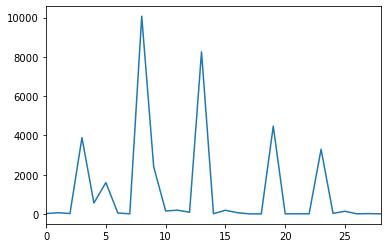

In [13]:
x=range(len(S))
y=countarray
plt.plot(x,y)
plt.xlim(0,28)

In [14]:
#Outputting the arrays containing unique particles by pdg code and how many of that particle for each file in the path
data_dir='/home/c479r989/research_repo/data-preprocess'
file_path=data_dir+'/ND_MC_Nominal_Files_FHC_mominkhan/'

length=len(os.listdir(file_path))
poi=0
idx=0
Ratio=numpy.zeros(length)

for h5_filename in os.listdir(file_path):
    print('Processing... {} of {}'.format(idx,len(os.listdir(file_path))), end="\r", flush=True)
    f=h5py.File(file_path+str(h5_filename))
    #f=h5py.File('/home/c479r989/research_repo/data-preprocess/ND_MC_Nominal_Files_FHC_mominkhan/neardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00010582_s17_c005_R19-11-18-prod5reco.x_v1_20191024_022032_sim.h5caf.h5')
    #print(f)
    #f.keys()
    #list(f['rec.mc.nu.prim'])
    
    finalstate=f['rec.mc.nu.prim']['pdg'][:]
    newfinalstate=numpy.zeros(len(finalstate))
   
    for a in range(len(finalstate)):
        newfinalstate[a]=finalstate[a,0]
        
    S=spread(newfinalstate)
    
    countarray=numpy.zeros(len(S))
    for a in range(len(S)):
        for pdgnumber in newfinalstate:
            if pdgnumber==S[a]:
                countarray[a]=countarray[a]+1
            else:
                continue
   
    Totalhitcount=sum(countarray)
    #References the array that tells you the amount of hits for a specific particle based on the position in the S array
    poi=countarray[20] #20 is the element in count array that represents the number of pi 0 hits
    if poi>0:
        poi+=1
   
    Ratio[idx]= poi/Totalhitcount   
        
    print(S)
    print(countarray)
    print('The number of overall hits is', Totalhitcount)
    print('The number of pi 0 hits is', poi)
    print('The percentage of hits that are pi 0 events is', 100*Ratio[idx],'%')
    idx+=1
    



/opt/software/software/IPython/7.9.0-foss-2019b-Python-3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  if sys.path[0] == '':


[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, -2112.0, 2112.0, 321.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.7000e+01 7.1000e+01 2.1000e+01 3.7990e+03 5.9100e+02 2.0000e+00
 1.6280e+03 4.1000e+01 6.0000e+00 1.0369e+04 6.0000e+00 2.4040e+03
 1.8700e+02 1.7300e+02 8.2000e+01 1.9000e+01 8.8370e+03 2.1000e+02
 6.2000e+01 2.0000e+00 3.0000e+00 4.3120e+03 8.0000e+00 1.5000e+01
 2.0000e+00 3.3020e+03 2.5000e+01 1.7900e+02 2.0000e+00 9.0000e+00
 2.0000e+00]
The number of overall hits is 36386.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.01099323915791788 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, 1000220480.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -1

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.9000e+01 3.6000e+01 1.7000e+01 3.7520e+03 5.9100e+02 4.0000e+00
 1.5550e+03 3.6000e+01 1.1000e+01 1.0457e+04 3.0000e+00 2.3600e+03
 1.4700e+02 1.7100e+02 1.0500e+02 8.6480e+03 1.9800e+02 7.0000e+00
 7.3000e+01 1.0000e+00 3.0000e+00 4.2020e+03 4.0000e+00 1.1000e+01
 1.0000e+00 3.2760e+03 2.6000e+01 1.6500e+02 2.0000e+01]
The number of overall hits is 35899.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.011142371653806512 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.8000e+01 6.8000e+01 1.7000e+01 3.8120e+03 5.6500e+

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.900e+01 6.500e+01 3.200e+01 3.702e+03 5.760e+02 5.000e+00 1.492e+03
 2.100e+01 5.000e+00 9.916e+03 2.000e+00 2.287e+03 1.800e+02 1.840e+02
 1.000e+02 8.249e+03 2.230e+02 1.000e+01 7.400e+01 5.000e+00 2.000e+00
 1.000e+00 4.035e+03 6.000e+00 1.000e+01 3.274e+03 1.600e+01 1.640e+02
 2.500e+01 3.000e+00]
The number of overall hits is 34683.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.0086497707810743 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.9000e+01 8.0000e+01 1.1000e+01 3.8170e+03 5.7300e+02 1.5060e+03


[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[7.0000e+00 4.1000e+01 1.6000e+01 3.8310e+03 5.7000e+02 2.0000e+00
 1.4160e+03 3.2000e+01 1.1000e+01 1.0575e+04 2.0000e+00 2.4090e+03
 1.6500e+02 1.5900e+02 1.1000e+02 9.0160e+03 2.3600e+02 4.0000e+00
 7.1000e+01 2.0000e+00 4.4090e+03 4.0000e+00 5.0000e+00 1.0000e+00
 3.5660e+03 3.5000e+01 1.7700e+02 3.0000e+00 1.7000e+01 3.0000e+00]
The number of overall hits is 36895.0
The number of pi 0 hits is 4410.0
The percentage of hits that are pi 0 events is 11.952839138094593 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.4000e+01 5.6000e+01 1.7000e+01

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.4000e+01 4.3000e+01 2.6000e+01 3.7720e+03 5.5400e+02 1.5440e+03
 5.0000e+01 4.0000e+00 1.0299e+04 2.2970e+03 1.8400e+02 1.8000e+02
 1.0100e+02 8.5170e+03 2.3500e+02 1.0000e+01 6.9000e+01 2.0000e+00
 4.0710e+03 5.0000e+00 1.0000e+01 1.0000e+00 3.4150e+03 2.5000e+01
 2.0300e+02 2.0000e+00 1.6000e+01 3.0000e+00]
The number of overall hits is 35652.0
The number of pi 0 hits is 11.0
The percentage of hits that are pi 0 events is 0.030853809042970942 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.300e+01 4.400e+01 1.500e+01 3.710e+03 5.550e+02 4.000e+00 1.653e+03
 4.900e+01 

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -16.0, -14.0, -13.0, -11.0]
[8.000e+00 5.300e+01 2.100e+01 3.587e+03 5.370e+02 2.000e+00 2.000e+00
 1.522e+03 4.900e+01 1.300e+01 9.657e+03 7.000e+00 2.153e+03 1.480e+02
 1.980e+02 1.080e+02 8.263e+03 2.330e+02 9.000e+00 9.400e+01 3.000e+00
 3.000e+00 1.000e+00 3.964e+03 4.000e+00 7.000e+00 2.000e+00 3.089e+03
 2.000e+00 2.500e+01 1.440e+02 1.800e+01]
The number of overall hits is 33926.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.011790367269940458 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.5000e+01 

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.900e+01 6.000e+01 1.500e+01 3.750e+03 5.170e+02 1.406e+03 4.700e+01
 7.000e+00 9.915e+03 4.000e+00 2.305e+03 1.650e+02 1.840e+02 9.700e+01
 8.077e+03 2.230e+02 7.000e+00 7.800e+01 7.000e+00 1.000e+00 4.051e+03
 8.000e+00 1.000e+01 2.000e+00 1.000e+00 3.288e+03 1.900e+01 2.020e+02
 1.100e+01]
The number of overall hits is 34476.0
The number of pi 0 hits is 4052.0
The percentage of hits that are pi 0 events is 11.753103608307228 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.600e+01 6.700e+01 1.000e+01 3.632e+03 5.270e+02 5.

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[2.300e+01 5.700e+01 1.500e+01 3.794e+03 6.040e+02 1.000e+00 1.654e+03
 5.900e+01 8.000e+00 9.754e+03 4.000e+00 2.251e+03 1.700e+02 1.770e+02
 1.270e+02 8.232e+03 2.600e+02 1.000e+01 3.800e+01 1.000e+00 4.202e+03
 2.000e+00 1.400e+01 1.000e+00 1.000e+00 3.249e+03 2.800e+01 1.350e+02
 2.100e+01]
The number of overall hits is 34892.0
The number of pi 0 hits is 4203.0
The percentage of hits that are pi 0 events is 12.0457411441018 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0]
[1.600e+01 6.200e+01 1.600e+01 3.776e+03 5.540e+02 4.000e+00 1.594e+03
 3.700e+01 1.300e+01 9.877e+0

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.000e+01 7.100e+01 1.400e+01 3.683e+03 5.940e+02 1.564e+03 2.900e+01
 2.000e+00 1.002e+04 8.000e+00 2.374e+03 1.450e+02 1.650e+02 1.070e+02
 8.348e+03 1.840e+02 1.100e+01 1.000e+00 5.700e+01 2.000e+00 1.000e+00
 4.159e+03 5.000e+00 1.200e+01 2.000e+00 1.000e+00 3.337e+03 2.700e+01
 1.690e+02 4.000e+00 2.000e+01 2.000e+00]
The number of overall hits is 35138.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005691843588138198 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14

[130.0, 11.0, 12.0, 13.0, 14.0, 3222.0, 22.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.1000e+01 7.5000e+01 1.2000e+01 3.7940e+03 5.7000e+02 4.7000e+01
 1.5630e+03 7.0000e+00 1.0288e+04 1.0000e+00 2.3930e+03 1.4000e+02
 1.8000e+02 8.6000e+01 8.5820e+03 1.8800e+02 1.3000e+01 7.2000e+01
 2.0000e+00 4.2400e+03 6.0000e+00 1.2000e+01 3.3240e+03 2.9000e+01
 1.8000e+02 1.6000e+01 6.0000e+00]
The number of overall hits is 35847.0
The number of pi 0 hits is 7.0
The percentage of hits that are pi 0 events is 0.019527436047646944 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.200e+01 5.300e+01 2.100e+01 3.709e+03 5.670e+02 1.597e+03 3.400e+01
 1.300e+01 9.995e+03 2.244e+0

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.2000e+01 4.9000e+01 2.6000e+01 3.7530e+03 5.5300e+02 1.4830e+03
 2.7000e+01 1.1000e+01 1.0052e+04 5.0000e+00 2.2440e+03 1.4600e+02
 1.6000e+02 1.0900e+02 8.4160e+03 1.9900e+02 7.0000e+00 6.8000e+01
 1.0000e+00 4.1460e+03 6.0000e+00 7.0000e+00 2.0000e+00 3.2570e+03
 2.6000e+01 1.7600e+02 9.0000e+00 4.0000e+00]
The number of overall hits is 34964.0
The number of pi 0 hits is 7.0
The percentage of hits that are pi 0 events is 0.02002059260954124 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 1000250550.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.7000e+01 4.8000e+01 2.0000e+01 3.7120e+03 5.6300e+02 1.5430e+03
 

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.1000e+01 5.3000e+01 1.0000e+01 3.7150e+03 5.5800e+02 1.5480e+03
 3.1000e+01 8.0000e+00 1.0068e+04 6.0000e+00 2.2720e+03 1.5900e+02
 1.7300e+02 8.9000e+01 8.4040e+03 2.0100e+02 1.0000e+01 5.9000e+01
 4.0000e+00 2.0000e+00 4.0910e+03 3.0000e+00 8.0000e+00 1.0000e+00
 3.2720e+03 2.1000e+01 1.9500e+02 1.0000e+00 8.0000e+00 6.0000e+00]
The number of overall hits is 34987.0
The number of pi 0 hits is 4092.0
The percentage of hits that are pi 0 events is 11.695772715580073 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.200e+01 6.700e+01

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[9.0000e+00 5.9000e+01 2.2000e+01 3.5830e+03 5.9600e+02 1.4390e+03
 3.7000e+01 7.0000e+00 1.0034e+04 1.1000e+01 2.2650e+03 1.7300e+02
 1.7700e+02 9.0000e+01 8.3040e+03 1.9900e+02 1.1000e+01 6.1000e+01
 4.0000e+00 1.0000e+00 4.0170e+03 4.0000e+00 7.0000e+00 3.2230e+03
 3.3000e+01 1.9900e+02 2.0000e+00 1.2000e+01 3.0000e+00]
The number of overall hits is 34582.0
The number of pi 0 hits is 4018.0
The percentage of hits that are pi 0 events is 11.618761205251287 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3222.0, 22.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.100e+01 4.800e+01 2.000e+01 3

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.6000e+01 5.2000e+01 2.5000e+01 3.7140e+03 6.0900e+02 1.5080e+03
 3.0000e+01 3.0000e+00 1.0105e+04 5.0000e+00 2.2920e+03 1.6500e+02
 1.5200e+02 1.2500e+02 8.5840e+03 2.4900e+02 9.0000e+00 6.7000e+01
 4.0000e+00 3.0000e+00 4.1860e+03 6.0000e+00 5.0000e+00 3.3550e+03
 2.3000e+01 1.7500e+02 1.7000e+01 2.0000e+00]
The number of overall hits is 35496.0
The number of pi 0 hits is 4187.0
The percentage of hits that are pi 0 events is 11.795695289610098 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.600e+01 6.400e+01 1.400e+01 3.671e+03 5.420e+02 2.000e+00 1.

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.300e+01 6.100e+01 2.500e+01 3.448e+03 5.350e+02 1.437e+03 3.900e+01
 1.000e+00 9.415e+03 3.000e+00 2.134e+03 1.490e+02 1.530e+02 1.010e+02
 7.913e+03 6.000e+00 2.140e+02 6.000e+01 2.000e+00 3.802e+03 6.000e+00
 7.000e+00 2.000e+00 3.039e+03 3.000e+01 1.700e+02 2.100e+01 1.000e+00]
The number of overall hits is 32787.0
The number of pi 0 hits is 7.0
The percentage of hits that are pi 0 events is 0.021349925275261535 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.3000e+01 5.8000e+01 2.4000e+01 3.7740e+03 5.6500e+02 1.5150e+03
 3.8000e+01 1.2

[130.0, 11.0, 12.0, 13.0, 14.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0]
[1.6000e+01 5.8000e+01 1.4000e+01 3.6880e+03 6.0900e+02 4.0000e+00
 1.4990e+03 3.7000e+01 5.0000e+00 1.0415e+04 8.0000e+00 2.4390e+03
 1.8900e+02 2.1000e+02 1.0500e+02 8.7600e+03 2.4000e+02 8.0000e+00
 7.3000e+01 4.2110e+03 4.0000e+00 1.0000e+01 2.0000e+00 1.0000e+00
 3.3990e+03 4.0000e+00 2.1000e+01 1.6900e+02 2.0000e+00 1.2000e+01]
The number of overall hits is 36212.0
The number of pi 0 hits is 5.0
The percentage of hits that are pi 0 events is 0.013807577598586106 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.600e+01 4.300e+01 1.700e+01 3.652e+

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, 1000220480.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.200e+01 6.700e+01 2.100e+01 3.748e+03 5.840e+02 1.554e+03 3.900e+01
 8.000e+00 1.018e+04 7.000e+00 2.393e+03 1.610e+02 1.820e+02 1.170e+02
 8.528e+03 2.210e+02 1.000e+00 1.400e+01 6.500e+01 1.000e+00 1.000e+00
 4.235e+03 4.000e+00 1.200e+01 3.229e+03 2.600e+01 1.970e+02 2.000e+00
 8.000e+00 2.000e+00]
The number of overall hits is 35619.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005614980768690867 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.300e+01 4.700e+01 7.000e+00 

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0]
[2.200e+01 5.900e+01 2.900e+01 3.658e+03 6.360e+02 1.523e+03 4.100e+01
 8.000e+00 9.727e+03 9.000e+00 2.320e+03 1.590e+02 1.900e+02 1.060e+02
 7.956e+03 2.290e+02 1.200e+01 8.300e+01 3.000e+00 4.160e+03 6.000e+00
 1.700e+01 3.256e+03 2.500e+01 1.740e+02 1.800e+01]
The number of overall hits is 34426.0
The number of pi 0 hits is 7.0
The percentage of hits that are pi 0 events is 0.020333468889792598 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.400e+01 5.300e+01 1.700e+01 3.800e+03 6.050e+02 2.000e+00 1.645e+03
 4.800e+01 6.000e+00 9.876e+03 5.000e+00 2

[130.0, 11.0, 12.0, 13.0, 14.0, 3222.0, 22.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.600e+01 4.600e+01 1.100e+01 3.846e+03 5.780e+02 2.400e+01 1.699e+03
 8.000e+00 1.023e+04 5.000e+00 2.300e+03 1.520e+02 1.760e+02 1.250e+02
 8.250e+03 1.930e+02 1.400e+01 6.000e+01 3.000e+00 4.238e+03 1.200e+01
 1.600e+01 2.000e+00 3.398e+03 1.600e+01 1.950e+02 4.000e+00 1.200e+01
 1.000e+00]
The number of overall hits is 35640.0
The number of pi 0 hits is 13.0
The percentage of hits that are pi 0 events is 0.03647586980920314 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[8.0000e+00 5.7000e+01 3.0000e+01 3.7960e+

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[9.000e+00 5.000e+01 1.100e+01 3.755e+03 5.320e+02 1.532e+03 4.600e+01
 9.000e+00 9.925e+03 2.000e+00 2.258e+03 1.610e+02 1.830e+02 1.070e+02
 8.436e+03 2.340e+02 9.000e+00 7.400e+01 3.000e+00 4.118e+03 6.000e+00
 1.500e+01 3.408e+03 2.900e+01 1.710e+02 6.000e+00 1.500e+01]
The number of overall hits is 35104.0
The number of pi 0 hits is 7.0
The percentage of hits that are pi 0 events is 0.019940747493163172 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.9000e+01 5.9000e+01 1.2000e+01 3.7130e+03 6.1400e+02 1.5050e+03
 4.1000e+01 6.0000e+00 1.0284e+04 6.0000e+00 2.3450

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.100e+01 5.000e+01 2.500e+01 3.765e+03 6.470e+02 1.649e+03 4.800e+01
 9.000e+00 9.683e+03 4.000e+00 2.273e+03 2.030e+02 2.150e+02 1.040e+02
 8.276e+03 2.490e+02 1.100e+01 8.500e+01 2.000e+00 4.237e+03 7.000e+00
 1.400e+01 2.000e+00 3.357e+03 2.700e+01 1.690e+02 1.700e+01 1.000e+00]
The number of overall hits is 35150.0
The number of pi 0 hits is 8.0
The percentage of hits that are pi 0 events is 0.02275960170697013 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[7.000e+00 5.900e+01 1.600e+01 3.731e+03 5.800e+02 2.000e+00 1.567e+03
 2.600e+01 5.000e+00 9.928e+03 2

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.6000e+01 5.7000e+01 1.6000e+01 3.8850e+03 5.6100e+02 2.0000e+00
 1.6150e+03 4.4000e+01 1.0000e+01 1.0334e+04 4.0000e+00 2.2830e+03
 1.7800e+02 2.1300e+02 1.0800e+02 8.4410e+03 2.2400e+02 1.2000e+01
 8.0000e+01 4.0000e+00 2.0000e+00 4.2110e+03 2.0000e+00 1.4000e+01
 1.0000e+00 3.2750e+03 3.5000e+01 1.8300e+02 1.3000e+01]
The number of overall hits is 35823.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008374507997655137 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.600e+01 5.600e+01 2.100e+01 3.763e+03 5.220

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 1000190390.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.800e+01 5.600e+01 1.600e+01 3.750e+03 5.450e+02 1.647e+03 4.300e+01
 9.000e+00 9.671e+03 6.000e+00 2.177e+03 1.750e+02 2.000e+00 1.710e+02
 1.010e+02 8.076e+03 2.500e+02 4.000e+00 7.100e+01 2.000e+00 1.000e+00
 4.073e+03 1.000e+01 7.000e+00 3.106e+03 3.100e+01 1.820e+02 1.000e+00
 1.400e+01 2.000e+00]
The number of overall hits is 34217.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005845047783265628 %
[130.0, 11.0, 12.0, 13.0, 14.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.500e+01 5.600e+

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[3.0000e+01 6.0000e+01 2.8000e+01 3.6650e+03 5.8900e+02 1.0000e+00
 1.4650e+03 3.0000e+01 3.0000e+00 1.0067e+04 4.0000e+00 2.2630e+03
 1.5900e+02 1.7500e+02 8.4000e+01 8.3860e+03 1.9200e+02 1.0000e+01
 6.8000e+01 1.0000e+00 2.0000e+00 3.0000e+00 4.0810e+03 4.0000e+00
 1.0000e+01 3.1870e+03 3.0000e+01 1.5300e+02 1.0000e+00 1.5000e+01
 2.0000e+00]
The number of overall hits is 34768.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008628624022089278 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -1

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.900e+01 4.600e+01 1.800e+01 3.694e+03 5.930e+02 1.505e+03 3.400e+01
 4.000e+00 9.820e+03 3.000e+00 2.187e+03 1.780e+02 1.810e+02 9.600e+01
 8.015e+03 2.230e+02 9.000e+00 6.900e+01 1.000e+00 2.000e+00 4.024e+03
 7.000e+00 1.300e+01 2.000e+00 3.199e+03 2.300e+01 1.700e+02 1.000e+00
 1.700e+01 4.000e+00]
The number of overall hits is 34157.0
The number of pi 0 hits is 4025.0
The percentage of hits that are pi 0 events is 11.78382176420646 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.300e+01 5.200e+01 2.200e+01 3.749e+03 5.75

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.600e+01 5.300e+01 2.300e+01 3.699e+03 5.310e+02 1.000e+00 2.000e+00
 1.433e+03 3.600e+01 5.000e+00 9.885e+03 8.000e+00 2.161e+03 1.230e+02
 1.500e+02 9.400e+01 7.997e+03 1.950e+02 1.500e+01 6.900e+01 3.958e+03
 8.000e+00 1.200e+01 3.094e+03 2.000e+00 1.800e+01 1.570e+02 6.000e+00
 1.500e+01 2.000e+00]
The number of overall hits is 33768.0
The number of pi 0 hits is 3959.0
The percentage of hits that are pi 0 events is 11.724117507699598 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 1000190390.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.000e+01 4.800e+01 2.000e+01 3.728e+03 5.330e+02 1.559e+03

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.8000e+01 7.4000e+01 2.6000e+01 3.7670e+03 5.7600e+02 2.0000e+00
 1.5870e+03 2.7000e+01 6.0000e+00 1.0195e+04 5.0000e+00 2.2920e+03
 1.4300e+02 1.3500e+02 7.9000e+01 8.5960e+03 2.1400e+02 1.1000e+01
 6.1000e+01 2.0000e+00 2.0000e+00 4.1400e+03 5.0000e+00 1.2000e+01
 3.2710e+03 1.8000e+01 1.8700e+02 1.0000e+00 1.6000e+01 2.0000e+00]
The number of overall hits is 35470.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008457851705666762 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.1000e+01 4.6

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.5000e+01 5.9000e+01 1.3000e+01 3.9060e+03 5.9300e+02 1.6100e+03
 3.8000e+01 7.0000e+00 1.0278e+04 5.0000e+00 2.3000e+03 1.6200e+02
 2.0000e+02 1.0400e+02 8.3690e+03 2.2500e+02 9.0000e+00 7.5000e+01
 3.0000e+00 3.0000e+00 4.2210e+03 1.0000e+01 1.1000e+01 2.0000e+00
 3.2820e+03 1.3000e+01 1.6400e+02 1.0000e+00 1.0000e+01 2.0000e+00]
The number of overall hits is 35700.0
The number of pi 0 hits is 4222.0
The percentage of hits that are pi 0 events is 11.826330532212886 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.600

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.600e+01 6.300e+01 3.100e+01 3.740e+03 5.740e+02 1.000e+00 1.544e+03
 4.900e+01 6.000e+00 9.994e+03 2.000e+00 2.303e+03 1.300e+02 1.740e+02
 1.100e+02 8.301e+03 2.020e+02 1.900e+01 7.800e+01 2.000e+00 1.000e+00
 4.144e+03 3.000e+00 1.100e+01 1.000e+00 3.451e+03 2.300e+01 1.540e+02
 2.000e+00 2.100e+01 3.000e+00]
The number of overall hits is 35153.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.0056894148436833275 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.300e+01 6.000e+01 1.000e+01 3.681e+03

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.100e+01 6.400e+01 2.000e+01 3.581e+03 5.280e+02 1.520e+03 4.800e+01
 3.000e+00 9.724e+03 1.000e+00 2.172e+03 1.460e+02 1.610e+02 1.170e+02
 8.095e+03 2.550e+02 1.000e+01 8.200e+01 1.000e+00 3.000e+00 3.932e+03
 6.000e+00 1.500e+01 3.211e+03 3.100e+01 1.590e+02 1.000e+00 1.300e+01
 2.000e+00]
The number of overall hits is 33912.0
The number of pi 0 hits is 3933.0
The percentage of hits that are pi 0 events is 11.597664543524417 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.3000e+01 5.6000e+01 1.8000e+01 3.8130e+03 5.7000e+02 1.5650e+03
 

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.200e+01 6.200e+01 1.400e+01 3.630e+03 5.490e+02 1.477e+03 2.100e+01
 8.000e+00 9.538e+03 2.000e+00 2.174e+03 1.910e+02 1.590e+02 9.900e+01
 7.873e+03 2.320e+02 8.000e+00 1.000e+00 5.800e+01 5.000e+00 4.051e+03
 7.000e+00 5.000e+00 2.000e+00 2.000e+00 3.116e+03 2.400e+01 1.700e+02
 1.000e+00 1.300e+01 2.000e+00]
The number of overall hits is 33516.0
The number of pi 0 hits is 4052.0
The percentage of hits that are pi 0 events is 12.089748179973745 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.1000e+01 5.5000e+01 1.400

[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0]
[1.400e+01 6.800e+01 3.000e+00 3.683e+03 6.250e+02 2.100e+01 1.454e+03
 5.100e+01 9.000e+00 9.966e+03 4.000e+00 2.325e+03 1.560e+02 1.670e+02
 8.000e+01 8.271e+03 2.010e+02 4.000e+00 6.200e+01 1.000e+00 4.201e+03
 8.000e+00 1.100e+01 3.258e+03 3.200e+01 1.860e+02 2.000e+01]
The number of overall hits is 34881.0
The number of pi 0 hits is 4202.0
The percentage of hits that are pi 0 events is 12.046672973825292 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.5000e+01 5.1000e+01 1.5000e+01 3.8520e+03 5.6400e+02 2.0000e+00
 1.5020e+03 3.4000e+01 8.0000e+00 1.0234e+04 2.000

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.400e+01 4.300e+01 1.600e+01 3.365e+03 5.100e+02 1.301e+03 4.200e+01
 1.000e+01 8.898e+03 3.000e+00 2.027e+03 1.690e+02 1.510e+02 8.500e+01
 7.367e+03 2.140e+02 5.000e+00 1.000e+00 5.300e+01 1.000e+00 1.000e+00
 3.694e+03 6.000e+00 9.000e+00 1.000e+00 2.830e+03 2.500e+01 1.500e+02
 2.000e+00 1.100e+01]
The number of overall hits is 31004.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.006450780544445878 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.8000e+01 4.9000e+01 2.2000e+01 3.8950e+03

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, 1000260560.0, 1000290640.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.000e+01 6.000e+01 1.700e+01 3.714e+03 5.830e+02 1.470e+03 3.700e+01
 1.000e+01 9.730e+03 6.000e+00 2.185e+03 1.770e+02 2.080e+02 9.700e+01
 8.153e+03 3.000e+00 1.940e+02 6.900e+01 2.000e+00 1.000e+00 4.165e+03
 5.000e+00 1.000e+01 1.000e+00 3.182e+03 3.600e+01 1.820e+02 1.000e+00
 1.900e+01 2.000e+00]
The number of overall hits is 34339.0
The number of pi 0 hits is 4166.0
The percentage of hits that are pi 0 events is 12.131978217187454 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 1000190390.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[8.000e+00 6

[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.4000e+01 6.0000e+01 2.0000e+00 3.8040e+03 6.0200e+02 9.0000e+00
 1.5710e+03 3.2000e+01 1.3000e+01 1.0408e+04 5.0000e+00 2.2050e+03
 1.7100e+02 1.6100e+02 9.3000e+01 8.5490e+03 2.0900e+02 1.0000e+01
 2.0000e+00 5.4000e+01 5.0000e+00 1.0000e+00 4.0570e+03 4.0000e+00
 1.0000e+01 1.0000e+00 3.3590e+03 2.4000e+01 1.9200e+02 8.0000e+00]
The number of overall hits is 35635.0
The number of pi 0 hits is 6.0
The percentage of hits that are pi 0 events is 0.01683737898133857 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.100e+01 5.500e+01 2.000e+01 3.736e

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.4000e+01 5.3000e+01 1.2000e+01 3.8930e+03 5.5100e+02 2.0000e+00
 1.5420e+03 3.0000e+01 1.3000e+01 1.0618e+04 3.0000e+00 2.3560e+03
 1.7300e+02 1.5800e+02 1.0100e+02 8.7890e+03 2.3100e+02 1.3000e+01
 7.0000e+01 2.0000e+00 4.2230e+03 3.0000e+00 8.0000e+00 2.0000e+00
 3.4890e+03 2.6000e+01 1.7100e+02 2.0000e+00 9.0000e+00 1.0000e+00]
The number of overall hits is 36558.0
The number of pi 0 hits is 4224.0
The percentage of hits that are pi 0 events is 11.554242573444936 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.400e+01 6.400e+01 2.200e+01 3.5

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.700e+01 5.200e+01 1.300e+01 3.689e+03 5.930e+02 1.658e+03 3.800e+01
 7.000e+00 9.828e+03 6.000e+00 2.375e+03 1.690e+02 2.120e+02 1.060e+02
 7.953e+03 2.160e+02 1.000e+01 6.900e+01 1.000e+00 2.000e+00 4.194e+03
 6.000e+00 1.100e+01 1.000e+00 3.287e+03 1.800e+01 1.780e+02 1.000e+00
 1.600e+01 2.000e+00]
The number of overall hits is 34728.0
The number of pi 0 hits is 4195.0
The percentage of hits that are pi 0 events is 12.079589956231283 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.9000e+01 7.8000e+01 2.7000e+01 3.692

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.9000e+01 5.8000e+01 1.8000e+01 3.7350e+03 5.4800e+02 1.4860e+03
 2.6000e+01 6.0000e+00 1.0097e+04 9.0000e+00 2.1950e+03 1.5800e+02
 1.6700e+02 1.1500e+02 8.0700e+03 2.3000e+02 1.2000e+01 6.6000e+01
 5.0000e+00 3.0000e+00 4.1010e+03 5.0000e+00 1.7000e+01 2.0000e+00
 1.0000e+00 3.2360e+03 2.7000e+01 1.5200e+02 2.0000e+00 1.7000e+01]
The number of overall hits is 34583.0
The number of pi 0 hits is 4102.0
The percentage of hits that are pi 0 events is 11.861319145244774 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.9000e+01 6.

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.600e+01 8.200e+01 1.500e+01 3.696e+03 5.570e+02 1.629e+03 3.200e+01
 2.000e+00 9.396e+03 6.000e+00 2.250e+03 1.550e+02 1.750e+02 9.800e+01
 7.858e+03 1.850e+02 6.000e+00 5.500e+01 2.000e+00 4.108e+03 7.000e+00
 1.500e+01 3.160e+03 1.700e+01 1.910e+02 1.000e+00 2.400e+01 6.000e+00]
The number of overall hits is 33744.0
The number of pi 0 hits is 8.0
The percentage of hits that are pi 0 events is 0.02370791844476055 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[8.000e+00 3.800e+01 1.900e+01 3.603e+03 5.560e+02 1.452e+03 3.100e+01
 6.000e+00

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.5000e+01 3.4000e+01 2.6000e+01 3.7590e+03 5.4900e+02 2.0000e+00
 1.4680e+03 3.4000e+01 1.0000e+01 1.0257e+04 5.0000e+00 2.3070e+03
 1.3500e+02 1.5800e+02 1.1000e+02 8.5770e+03 2.0600e+02 1.5000e+01
 1.0000e+00 8.0000e+01 1.0000e+00 4.2210e+03 5.0000e+00 2.0000e+00
 2.0000e+00 1.0000e+00 3.2520e+03 3.3000e+01 1.7600e+02 1.0000e+00
 1.4000e+01 2.0000e+00]
The number of overall hits is 35458.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005640476056179141 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -16.0, -14.0, -13.0, -11.0, 1000140280.0]
[9.000e+00 5.200e+01 1.800e+01 3.738e+03 5.640e+02 5.000e+00 2.000e+00
 1.580e+03 4.000e+01 6.000e+00 9.715e+03 7.000e+00 2.240e+03 1.370e+02
 1.400e+02 8.000e+01 8.142e+03 2.140e+02 1.200e+01 7.500e+01 1.000e+00
 2.000e+00 4.064e+03 7.000e+00 1.200e+01 3.094e+03 2.000e+00 2.100e+01
 1.620e+02 1.000e+01 2.000e+00]
The number of overall hits is 34153.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.00585600093696015 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, 1000220480.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.300e+01 5.900e+01 1.200e+01 3.737e+03 5.400e+02

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.000e+01 4.700e+01 1.900e+01 3.577e+03 5.680e+02 1.414e+03 3.200e+01
 5.000e+00 9.444e+03 3.000e+00 2.128e+03 1.440e+02 1.810e+02 9.700e+01
 7.776e+03 1.200e+01 1.790e+02 6.500e+01 5.000e+00 1.000e+00 3.963e+03
 7.000e+00 1.500e+01 2.000e+00 3.056e+03 2.600e+01 1.880e+02 2.000e+00
 1.600e+01]
The number of overall hits is 32992.0
The number of pi 0 hits is 3964.0
The percentage of hits that are pi 0 events is 12.015033947623667 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.2000e+01 6.8000e+01 1.0000e+01 3.875

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.600e+01 5.400e+01 2.400e+01 3.763e+03 5.400e+02 1.517e+03 4.200e+01
 8.000e+00 9.889e+03 2.000e+00 2.332e+03 1.670e+02 1.710e+02 1.040e+02
 8.304e+03 2.120e+02 6.000e+00 6.800e+01 4.000e+00 1.000e+00 4.132e+03
 9.000e+00 1.300e+01 1.000e+00 3.185e+03 2.300e+01 1.980e+02 5.000e+00
 1.300e+01]
The number of overall hits is 34803.0
The number of pi 0 hits is 4133.0
The percentage of hits that are pi 0 events is 11.875413039105824 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.200e+01 6.600e+01 1.800e+01 3.732e+03 5.690e+02 4.000e+00 1.499e+03
 4.

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.0000e+01 5.8000e+01 1.5000e+01 3.7370e+03 5.9100e+02 4.0000e+00
 1.4640e+03 2.8000e+01 5.0000e+00 1.0228e+04 4.0000e+00 2.2890e+03
 1.5400e+02 1.6500e+02 1.0700e+02 8.5820e+03 2.1400e+02 1.3000e+01
 6.0000e+01 2.0000e+00 4.1370e+03 6.0000e+00 1.1000e+01 4.0000e+00
 2.0000e+00 3.1570e+03 2.8000e+01 1.7500e+02 3.0000e+00 1.8000e+01
 4.0000e+00]
The number of overall hits is 35285.0
The number of pi 0 hits is 4138.0
The percentage of hits that are pi 0 events is 11.727362902083039 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.200e+0

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[9.0000e+00 6.0000e+01 2.0000e+01 3.7390e+03 5.7200e+02 1.0000e+00
 1.5240e+03 3.3000e+01 8.0000e+00 1.0168e+04 4.0000e+00 2.4290e+03
 1.7300e+02 1.8700e+02 9.0000e+01 8.4370e+03 1.9900e+02 1.2000e+01
 6.9000e+01 4.0000e+00 4.2650e+03 7.0000e+00 8.0000e+00 1.0000e+00
 3.1740e+03 2.5000e+01 1.6600e+02 1.3000e+01]
The number of overall hits is 35397.0
The number of pi 0 hits is 4266.0
The percentage of hits that are pi 0 events is 12.051868802440884 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.7000e+01 5.7000e+01 2.0000e+01 3.7620e+03 5.4900e+02 2.0000

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, 1000220480.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.200e+01 6.400e+01 1.600e+01 3.646e+03 5.980e+02 4.000e+00 1.471e+03
 4.400e+01 8.000e+00 9.878e+03 7.000e+00 2.190e+03 1.850e+02 1.820e+02
 9.500e+01 8.241e+03 2.500e+02 1.000e+00 1.400e+01 6.200e+01 1.000e+00
 2.000e+00 3.978e+03 3.000e+00 1.200e+01 2.000e+00 3.000e+00 3.281e+03
 1.700e+01 1.810e+02 3.000e+00 1.500e+01 5.000e+00]
The number of overall hits is 34471.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005801978474659859 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0,

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.7000e+01 4.8000e+01 1.9000e+01 3.7850e+03 5.7800e+02 1.5290e+03
 3.2000e+01 5.0000e+00 1.0402e+04 4.0000e+00 2.3250e+03 1.4500e+02
 1.6900e+02 8.2000e+01 8.4870e+03 1.9300e+02 8.0000e+00 7.3000e+01
 2.0000e+00 1.0000e+00 4.2110e+03 2.0000e+00 1.2000e+01 1.0000e+00
 3.5070e+03 1.3000e+01 1.6900e+02 2.0000e+00 1.3000e+01 4.0000e+00]
The number of overall hits is 35838.0
The number of pi 0 hits is 4212.0
The percentage of hits that are pi 0 events is 11.752887995981919 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.400e+01 6.50

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.200e+01 5.700e+01 2.200e+01 3.568e+03 5.060e+02 1.000e+00 1.497e+03
 2.700e+01 5.000e+00 9.429e+03 6.000e+00 2.206e+03 1.600e+02 1.750e+02
 6.700e+01 7.816e+03 1.840e+02 7.000e+00 7.100e+01 4.000e+00 1.000e+00
 4.002e+03 1.000e+00 1.100e+01 3.213e+03 1.400e+01 1.710e+02 1.900e+01
 2.000e+00]
The number of overall hits is 33254.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.006014314067480603 %
[130.0, 11.0, 12.0, 13.0, 14.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -16.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.200e+01 5.700e+01 1.400e+01 3.676e+03 6.000e+02 2.000e+00 1.522e+03


[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.400e+01 4.200e+01 1.400e+01 3.586e+03 5.540e+02 6.000e+00 1.531e+03
 3.700e+01 3.000e+00 9.809e+03 7.000e+00 2.252e+03 1.600e+02 1.880e+02
 9.800e+01 8.154e+03 2.070e+02 2.000e+01 6.500e+01 6.000e+00 1.000e+00
 4.085e+03 3.000e+00 8.000e+00 2.000e+00 3.028e+03 2.100e+01 1.850e+02
 1.000e+00 1.100e+01 2.000e+00]
The number of overall hits is 34110.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005863383172090297 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.800e+01 6.800e+01 2.100e+01 3.

[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.100e+01 6.300e+01 5.000e+00 3.596e+03 5.880e+02 2.400e+01 1.492e+03
 5.500e+01 4.000e+00 9.583e+03 1.000e+00 2.121e+03 2.000e+02 2.030e+02
 8.500e+01 8.042e+03 2.250e+02 1.100e+01 6.800e+01 4.000e+00 1.000e+00
 3.913e+03 5.000e+00 6.000e+00 3.176e+03 1.600e+01 1.480e+02 3.000e+00
 1.900e+01 5.000e+00]
The number of overall hits is 33673.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.0059394767320999015 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.3000e+01 6.2000e+01 1.5000e+01 3.6830e+03 5.6200e+02 

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.7000e+01 5.4000e+01 1.8000e+01 3.7080e+03 5.3300e+02 1.6080e+03
 4.3000e+01 6.0000e+00 1.0002e+04 4.0000e+00 2.3280e+03 1.5000e+02
 1.6400e+02 8.6000e+01 8.2370e+03 1.9100e+02 1.1000e+01 4.6000e+01
 2.0000e+00 4.2110e+03 4.0000e+00 2.0000e+00 2.0000e+00 3.2560e+03
 2.3000e+01 2.0100e+02 1.3000e+01 2.0000e+00]
The number of overall hits is 34922.0
The number of pi 0 hits is 5.0
The percentage of hits that are pi 0 events is 0.014317622129316764 %
[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 3222.0, 22.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.700e+01 4.700e+01 2.000e+00 3.677e+03 5.270e+02

[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.200e+01 5.000e+01 3.000e+00 3.767e+03 6.050e+02 3.400e+01 1.603e+03
 4.200e+01 3.000e+00 9.881e+03 3.000e+00 2.345e+03 1.590e+02 1.790e+02
 1.030e+02 8.241e+03 2.490e+02 1.400e+01 7.800e+01 2.000e+00 4.177e+03
 3.000e+00 1.400e+01 7.000e+00 1.000e+00 3.364e+03 2.900e+01 1.770e+02
 3.000e+00 2.100e+01 3.000e+00]
The number of overall hits is 35172.0
The number of pi 0 hits is 4178.0
The percentage of hits that are pi 0 events is 11.87876720118276 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.5000e+01 5.1000e+01 2.9000e+01 3.9560

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.300e+01 5.100e+01 2.600e+01 3.654e+03 5.740e+02 1.498e+03 2.700e+01
 6.000e+00 9.986e+03 3.000e+00 2.298e+03 1.610e+02 2.120e+02 1.050e+02
 8.207e+03 1.860e+02 9.000e+00 8.300e+01 3.000e+00 1.000e+00 4.136e+03
 4.000e+00 1.400e+01 3.000e+00 3.156e+03 1.900e+01 1.690e+02 1.800e+01
 1.000e+00]
The number of overall hits is 34633.0
The number of pi 0 hits is 4137.0
The percentage of hits that are pi 0 events is 11.945254526030087 %
[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.000e+01 4.800e+01 6.000e+00 3.709e+03 5.980e+

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.0000e+01 6.5000e+01 2.2000e+01 3.8860e+03 5.3500e+02 1.6200e+03
 4.1000e+01 6.0000e+00 1.0705e+04 2.0000e+00 2.4220e+03 1.9800e+02
 2.1300e+02 1.0300e+02 8.6810e+03 2.4000e+02 1.1000e+01 7.7000e+01
 2.0000e+00 1.0000e+00 4.3180e+03 5.0000e+00 1.9000e+01 1.0000e+00
 3.4280e+03 2.2000e+01 1.8100e+02 1.0000e+00 1.8000e+01 5.0000e+00]
The number of overall hits is 36848.0
The number of pi 0 hits is 4319.0
The percentage of hits that are pi 0 events is 11.72112462006079 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.700e+01 5.400e+01 2.700e+01 

[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[3.3000e+01 7.9000e+01 5.0000e+00 3.7590e+03 6.2200e+02 3.6000e+01
 1.6390e+03 3.1000e+01 7.0000e+00 1.0015e+04 2.0000e+00 2.2610e+03
 1.8300e+02 1.6100e+02 8.6000e+01 8.3750e+03 2.2700e+02 1.8000e+01
 6.3000e+01 2.0000e+00 4.1110e+03 6.0000e+00 1.1000e+01 3.0000e+00
 1.0000e+00 3.3450e+03 1.3000e+01 1.5300e+02 4.0000e+00 1.7000e+01
 1.0000e+00]
The number of overall hits is 35269.0
The number of pi 0 hits is 4112.0
The percentage of hits that are pi 0 events is 11.658963962686778 %
[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[9.0

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.6000e+01 6.0000e+01 2.0000e+01 3.7540e+03 6.4200e+02 1.4900e+03
 4.1000e+01 1.7000e+01 1.0135e+04 6.0000e+00 2.3220e+03 1.7500e+02
 2.1800e+02 1.0900e+02 8.5650e+03 2.2200e+02 1.0000e+01 7.4000e+01
 2.0000e+00 1.0000e+00 4.1600e+03 9.0000e+00 9.0000e+00 3.0000e+00
 3.4910e+03 2.4000e+01 2.0500e+02 5.0000e+00 1.8000e+01 4.0000e+00]
The number of overall hits is 35817.0
The number of pi 0 hits is 4161.0
The percentage of hits that are pi 0 events is 11.61738839098752 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.600e+01 6.500e+01 1

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.700e+01 7.200e+01 2.400e+01 3.779e+03 5.450e+02 1.575e+03 3.400e+01
 8.000e+00 9.987e+03 5.000e+00 2.270e+03 1.610e+02 1.800e+02 1.070e+02
 8.203e+03 2.110e+02 9.000e+00 5.600e+01 1.000e+00 1.000e+00 4.161e+03
 5.000e+00 1.600e+01 3.000e+00 1.000e+00 3.224e+03 1.600e+01 1.860e+02
 2.000e+00 2.400e+01 1.000e+00]
The number of overall hits is 34884.0
The number of pi 0 hits is 4162.0
The percentage of hits that are pi 0 events is 11.930971218896916 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.100e+01 6.200e+01 1.800e+01

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.9000e+01 5.5000e+01 2.0000e+01 3.7900e+03 6.0300e+02 1.5520e+03
 2.8000e+01 1.4000e+01 1.0735e+04 1.0000e+00 2.3920e+03 1.4300e+02
 1.4000e+02 1.0200e+02 9.0790e+03 2.0200e+02 7.0000e+00 7.9000e+01
 6.0000e+00 2.0000e+00 2.0000e+00 4.2140e+03 9.0000e+00 1.1000e+01
 1.0000e+00 3.3320e+03 2.0000e+01 1.8900e+02 1.0000e+00 1.1000e+01
 6.0000e+00]
The number of overall hits is 36765.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008159934720522235 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.400e+01 6.700e+01 1.300e+01 3.730e+03 5.950e+02 1.000e+00 1.592e+03
 3.900e+01 5.000e+00 9.933e+03 2.000e+00 2.320e+03 1.740e+02 1.840e+02
 7.900e+01 8.482e+03 2.050e+02 6.000e+00 6.700e+01 1.000e+00 4.230e+03
 9.000e+00 1.200e+01 2.000e+00 3.309e+03 2.200e+01 2.020e+02 2.000e+00
 1.900e+01 2.000e+00]
The number of overall hits is 35318.0
The number of pi 0 hits is 4231.0
The percentage of hits that are pi 0 events is 11.979727051361913 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.800e+01 5.600e+01 2.700e+01 3.825e+03 5.920e+02 

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.700e+01 4.000e+01 1.700e+01 3.663e+03 5.420e+02 1.716e+03 3.400e+01
 7.000e+00 9.667e+03 6.000e+00 2.292e+03 1.550e+02 1.620e+02 9.600e+01
 8.120e+03 2.190e+02 9.000e+00 7.200e+01 1.000e+00 4.000e+00 2.000e+00
 4.118e+03 4.000e+00 1.300e+01 3.163e+03 1.900e+01 1.710e+02 5.000e+00
 8.000e+00]
The number of overall hits is 34342.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008735658959874206 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.700e+01 4.700e+01 3.000e+01 3.750e+03 5.610e+02 1.441e+03 5.200e+01
 8.000e

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.3000e+01 6.7000e+01 2.1000e+01 3.7350e+03 6.0700e+02 4.0000e+00
 1.5880e+03 2.5000e+01 1.1000e+01 1.0134e+04 3.0000e+00 2.3000e+03
 1.6800e+02 1.9800e+02 8.9000e+01 8.1720e+03 2.1800e+02 3.0000e+00
 7.9000e+01 3.0000e+00 2.0000e+00 4.0800e+03 4.0000e+00 6.0000e+00
 1.0000e+00 1.0000e+00 3.3710e+03 3.6000e+01 1.7100e+02 4.0000e+00
 8.0000e+00 2.0000e+00]
The number of overall hits is 35134.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008538737405362326 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 1000250550.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000501190.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.0000e+01 5.8000e+01 2.7000e+01 3.7090e+03 6.1400e+02 1.0000e+00
 1.5100e+03 3.4000e+01 3.0000e+00 1.0047e+04 9.0000e+00 2.3650e+03
 1.6900e+02 1.0000e+00 1.8800e+02 9.8000e+01 8.6010e+03 2.0800e+02
 1.2000e+01 1.0000e+00 7.0000e+01 1.0000e+00 1.0000e+00 4.3000e+03
 7.0000e+00 1.3000e+01 1.0000e+00 3.4230e+03 2.7000e+01 2.0200e+02
 2.2000e+01 2.0000e+00]
The number of overall hits is 35744.0
The number of pi 0 hits is 71.0
The percentage of hits that are pi 0 events is 0.19863473589973143 %
[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.500e+01 6.900e+01 2.900e+01 3.772e+03 5.220e+02 3.000e+00 1.568e+03
 3.000e+01 9.000e+00 9.698e+03 7.000e+00 2.206e+03 1.640e+02 1.650e+02
 9.600e+01 7.937e+03 1.830e+02 8.000e+00 5.200e+01 5.000e+00 4.079e+03
 4.000e+00 7.000e+00 1.000e+00 2.000e+00 3.147e+03 2.400e+01 1.780e+02
 2.000e+00 2.500e+01 7.000e+00]
The number of overall hits is 34014.0
The number of pi 0 hits is 4080.0
The percentage of hits that are pi 0 events is 11.995060857294055 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.3000e+01 

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[3.300e+01 6.700e+01 1.600e+01 3.640e+03 5.350e+02 4.000e+00 1.452e+03
 3.500e+01 1.200e+01 9.558e+03 5.000e+00 2.208e+03 1.690e+02 1.800e+02
 8.900e+01 7.921e+03 2.240e+02 1.000e+01 6.700e+01 2.000e+00 4.135e+03
 4.000e+00 7.000e+00 2.000e+00 3.084e+03 2.900e+01 1.730e+02 2.000e+00
 9.000e+00 6.000e+00]
The number of overall hits is 33678.0
The number of pi 0 hits is 4136.0
The percentage of hits that are pi 0 events is 12.281014312013777 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.4000e+01 4.6000e+01 1.7000e+01 3.8140e+03 6.1000e+02 1.5660e+03
 3.400

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[6.000e+00 5.000e+01 1.600e+01 3.679e+03 6.090e+02 1.000e+00 1.508e+03
 4.300e+01 9.000e+00 1.012e+04 2.000e+00 2.278e+03 1.660e+02 1.840e+02
 1.000e+02 8.277e+03 2.370e+02 1.100e+01 8.000e+01 3.000e+00 2.000e+00
 4.134e+03 5.000e+00 1.100e+01 3.275e+03 2.800e+01 1.610e+02 2.000e+00
 1.000e+01 2.000e+00]
The number of overall hits is 35009.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008569225056414064 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.600e+01 5.200e+01 2.200e+01 3.806e+03 6.120e+02 3.000e+00 

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.700e+01 6.500e+01 2.300e+01 3.636e+03 5.970e+02 4.000e+00 1.535e+03
 2.700e+01 9.000e+00 9.944e+03 3.000e+00 2.266e+03 1.750e+02 1.990e+02
 8.500e+01 8.182e+03 2.080e+02 1.100e+01 6.400e+01 2.000e+00 1.000e+00
 4.124e+03 8.000e+00 1.700e+01 2.000e+00 3.287e+03 3.000e+01 1.810e+02
 2.200e+01 4.000e+00]
The number of overall hits is 34728.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005759041695461875 %
[130.0, 11.0, 12.0, 13.0, 14.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0]
[1.3000e+01 6.3000e+01 3.2000e+

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.2000e+01 5.3000e+01 2.3000e+01 3.7730e+03 6.3500e+02 2.0000e+00
 1.4330e+03 2.6000e+01 5.0000e+00 1.0133e+04 4.0000e+00 2.3110e+03
 1.3700e+02 1.5700e+02 1.0100e+02 8.4810e+03 1.8300e+02 1.1000e+01
 2.0000e+00 4.9000e+01 1.0000e+00 2.0000e+00 4.2210e+03 7.0000e+00
 1.4000e+01 3.2400e+03 2.2000e+01 1.5900e+02 3.0000e+00 1.0000e+01
 2.0000e+00]
The number of overall hits is 35212.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005679881858457345 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.6000e+01 7.0000e+01 2.3000e+01 3.7050e+03 5.8600e+02 1.5300e+03
 3.6000e+01 1.2000e+01 1.0141e+04 4.0000e+00 2.2240e+03 1.3500e+02
 1.7400e+02 8.9000e+01 8.2810e+03 1.8100e+02 4.0000e+00 7.8000e+01
 2.0000e+00 4.0980e+03 5.0000e+00 6.0000e+00 3.2300e+03 2.0000e+01
 1.7900e+02 5.0000e+00 1.9000e+01 3.0000e+00]
The number of overall hits is 34856.0
The number of pi 0 hits is 6.0
The percentage of hits that are pi 0 events is 0.017213679137020887 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.5000e+01 5.8000e+01 2.7000e+01 3.7410e+03 6.1700e+02 2.0000e+00
 1.6030e+03 4.2000e+

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.5000e+01 5.8000e+01 1.4000e+01 3.9030e+03 6.1100e+02 1.6350e+03
 4.8000e+01 2.0000e+00 1.0556e+04 4.0000e+00 2.4160e+03 2.0700e+02
 2.1500e+02 9.2000e+01 9.0410e+03 2.3600e+02 1.2000e+01 7.9000e+01
 1.0000e+00 3.0000e+00 4.4310e+03 8.0000e+00 1.1000e+01 3.5040e+03
 2.4000e+01 1.9100e+02 1.0000e+00 1.2000e+01 1.0000e+00]
The number of overall hits is 37341.0
The number of pi 0 hits is 4432.0
The percentage of hits that are pi 0 events is 11.86899118930934 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.100e+01 6.300e+01 2.000e+01 3.884e+03 5.570e+

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.600e+01 4.300e+01 2.100e+01 3.649e+03 5.330e+02 3.000e+00 1.463e+03
 3.300e+01 1.000e+00 9.913e+03 5.000e+00 2.314e+03 1.550e+02 1.630e+02
 8.300e+01 8.167e+03 1.990e+02 5.000e+00 6.300e+01 2.000e+00 2.000e+00
 4.042e+03 2.000e+00 1.400e+01 3.144e+03 2.900e+01 2.020e+02 5.000e+00
 1.100e+01 1.000e+00]
The number of overall hits is 34283.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008750692763177085 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.800e+01 6.100e+01 2.000e+01 3.664e+03 6.140e+02 2.000e

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.400e+01 4.900e+01 1.900e+01 3.680e+03 6.190e+02 1.601e+03 3.200e+01
 8.000e+00 9.894e+03 2.380e+03 1.350e+02 1.710e+02 1.140e+02 8.225e+03
 2.090e+02 1.300e+01 6.800e+01 4.000e+00 4.244e+03 9.000e+00 1.400e+01
 1.000e+00 3.197e+03 1.600e+01 1.850e+02 1.000e+00 1.700e+01 2.000e+00]
The number of overall hits is 34931.0
The number of pi 0 hits is 15.0
The percentage of hits that are pi 0 events is 0.04294179954767971 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.5000e+01 5.9000e+01 1.8000e+01 3.6910e+03 5.6600e+02 6.0000e+00
 1.6020e+03 3.8000e+01 1.0000

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, 1000220480.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.0000e+01 4.8000e+01 1.1000e+01 3.8000e+03 5.8600e+02 2.0000e+00
 1.5300e+03 4.4000e+01 1.6000e+01 1.0255e+04 5.0000e+00 2.3840e+03
 1.6100e+02 2.0400e+02 1.1800e+02 8.4240e+03 2.3600e+02 1.0000e+00
 6.0000e+00 7.4000e+01 1.0000e+00 4.1990e+03 7.0000e+00 1.2000e+01
 1.0000e+00 3.2930e+03 2.5000e+01 1.8600e+02 2.0000e+00 1.6000e+01
 2.0000e+00]
The number of overall hits is 35669.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005607109815245732 %
[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.7000e+0

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.700e+01 7.100e+01 1.300e+01 3.712e+03 5.710e+02 1.627e+03 4.100e+01
 5.000e+00 9.904e+03 2.000e+00 2.313e+03 1.750e+02 1.620e+02 1.140e+02
 7.994e+03 2.540e+02 1.200e+01 7.700e+01 1.000e+00 1.000e+00 4.159e+03
 3.000e+00 9.000e+00 3.057e+03 2.600e+01 1.690e+02 1.000e+01 2.000e+00]
The number of overall hits is 34501.0
The number of pi 0 hits is 4160.0
The percentage of hits that are pi 0 events is 12.057621518216862 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.5000e+01 7.4000e+01 1.1000e+01 3.7780e+03 5.4600e+02 1.5100e+03
 2.9000e+01 5.0000e+00 1.0

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[9.0000e+00 7.0000e+01 2.4000e+01 3.6290e+03 5.7800e+02 1.5840e+03
 3.4000e+01 7.0000e+00 1.0241e+04 6.0000e+00 2.3380e+03 1.7200e+02
 1.7600e+02 9.6000e+01 8.3050e+03 2.3000e+02 1.8000e+01 1.0000e+00
 8.3000e+01 2.0000e+00 1.0000e+00 4.1140e+03 8.0000e+00 1.6000e+01
 3.2670e+03 1.6000e+01 2.1400e+02 1.0000e+00 1.4000e+01 2.0000e+00]
The number of overall hits is 35256.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005672793283412752 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.0000e+01 4.2

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[9.000e+00 6.500e+01 2.000e+01 3.699e+03 5.530e+02 6.000e+00 1.494e+03
 3.000e+01 2.000e+00 9.858e+03 5.000e+00 2.099e+03 1.520e+02 1.780e+02
 9.100e+01 8.235e+03 1.860e+02 4.000e+00 7.400e+01 3.000e+00 3.000e+00
 2.000e+00 3.961e+03 6.000e+00 1.000e+01 1.000e+00 1.000e+00 3.221e+03
 2.200e+01 1.670e+02 1.300e+01 2.000e+00]
The number of overall hits is 34172.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.011705489874751257 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, 1000220480.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280

[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.4000e+01 5.9000e+01 4.0000e+00 3.7000e+03 6.1600e+02 2.1000e+01
 1.4940e+03 4.4000e+01 3.0000e+00 1.0218e+04 3.0000e+00 2.2830e+03
 1.5200e+02 1.6200e+02 8.4000e+01 8.1330e+03 2.0400e+02 1.3000e+01
 6.3000e+01 3.0000e+00 1.0000e+00 4.0420e+03 5.0000e+00 1.0000e+01
 1.0000e+00 3.0970e+03 2.7000e+01 1.5000e+02 2.0000e+00 1.3000e+01
 6.0000e+00]
The number of overall hits is 34627.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005775839662690964 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.8000e+01 6.7000e+01 1.5000e+01 3.8110e+03 5.7900e+02 1.6070e+03
 4.6000e+01 8.0000e+00 1.0306e+04 5.0000e+00 2.3780e+03 1.9300e+02
 1.9100e+02 1.1000e+02 8.5030e+03 2.5500e+02 1.2000e+01 7.0000e+01
 3.0000e+00 4.3450e+03 4.0000e+00 1.6000e+01 2.0000e+00 3.3920e+03
 2.9000e+01 2.4200e+02 1.0000e+01 3.0000e+00]
The number of overall hits is 36220.0
The number of pi 0 hits is 5.0
The percentage of hits that are pi 0 events is 0.01380452788514633 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.7000e+01 6.3000e+01 1.3000e+01 3.6780e+03 5.7400e+02 1.4

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.900e+01 6.600e+01 1.900e+01 3.698e+03 4.990e+02 1.474e+03 3.500e+01
 2.000e+00 9.664e+03 2.000e+00 2.214e+03 1.610e+02 1.880e+02 9.500e+01
 8.072e+03 2.050e+02 1.400e+01 9.200e+01 4.000e+00 4.110e+03 6.000e+00
 1.100e+01 1.000e+00 3.072e+03 1.900e+01 1.700e+02 1.000e+00 2.500e+01]
The number of overall hits is 33938.0
The number of pi 0 hits is 7.0
The percentage of hits that are pi 0 events is 0.020625847133007247 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.4000e+01 7.2000e+01 1.3000e+01 3.7360e+03 5.6800e+02 1.0000e+00
 1.6200e+03 4.0000e+01 3.0000e+00 1.0102e+

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.800e+01 5.500e+01 2.800e+01 3.562e+03 6.010e+02 1.000e+00 1.490e+03
 2.700e+01 5.000e+00 9.935e+03 6.000e+00 2.190e+03 1.460e+02 1.510e+02
 8.500e+01 8.265e+03 2.020e+02 7.000e+00 5.700e+01 1.000e+00 3.000e+00
 3.920e+03 1.100e+01 1.200e+01 1.000e+00 3.034e+03 3.600e+01 1.490e+02
 1.000e+00 2.000e+01]
The number of overall hits is 34019.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.011758135159763662 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, 1000220480.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.100e+01 5.700e+01 2

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.7000e+01 6.5000e+01 1.3000e+01 3.7860e+03 5.8100e+02 1.5650e+03
 4.3000e+01 4.0000e+00 1.0614e+04 2.0000e+00 2.3250e+03 1.6700e+02
 1.6100e+02 9.8000e+01 8.8280e+03 2.2100e+02 1.3000e+01 4.8000e+01
 4.2320e+03 5.0000e+00 8.0000e+00 3.2950e+03 2.4000e+01 1.8300e+02
 1.5000e+01 2.0000e+00]
The number of overall hits is 36315.0
The number of pi 0 hits is 9.0
The percentage of hits that are pi 0 events is 0.024783147459727387 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.400e+01 5.900e+01 1.600e+01 3.592e+03 6.100e+02 1.455e+03 3.200e+01
 1.5

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[6.000e+00 6.400e+01 1.600e+01 3.562e+03 5.660e+02 1.507e+03 3.900e+01
 1.500e+01 9.687e+03 1.000e+00 2.131e+03 1.510e+02 1.650e+02 9.800e+01
 8.008e+03 1.940e+02 1.300e+01 5.500e+01 2.000e+00 2.000e+00 1.000e+00
 3.915e+03 7.000e+00 1.100e+01 1.000e+00 3.075e+03 2.600e+01 1.600e+02
 1.700e+01]
The number of overall hits is 33495.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005971040453799075 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -16.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.200e+01 4.500e+01 2.000e+01 3.731e+03 6.040e+02 1.000e+00 1.000e+00


[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.0000e+01 5.7000e+01 2.6000e+01 3.7280e+03 5.7200e+02 1.4530e+03
 4.9000e+01 7.0000e+00 1.0132e+04 6.0000e+00 2.3250e+03 1.7600e+02
 1.7400e+02 1.1300e+02 8.2700e+03 2.7700e+02 8.0000e+00 7.2000e+01
 2.0000e+00 4.1350e+03 5.0000e+00 9.0000e+00 2.0000e+00 1.0000e+00
 3.2300e+03 3.0000e+01 1.9600e+02 7.0000e+00 5.0000e+00]
The number of overall hits is 35087.0
The number of pi 0 hits is 6.0
The percentage of hits that are pi 0 events is 0.017100350557186422 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0, 1000140

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.0000e+01 6.0000e+01 1.6000e+01 3.6940e+03 5.7700e+02 1.4510e+03
 3.5000e+01 1.0231e+04 7.0000e+00 2.1770e+03 1.7400e+02 1.6500e+02
 1.2700e+02 8.3760e+03 1.5000e+01 2.2800e+02 4.9000e+01 3.0000e+00
 3.9700e+03 4.0000e+00 8.0000e+00 2.0000e+00 1.0000e+00 3.2310e+03
 2.2000e+01 1.8300e+02 1.0000e+00 1.6000e+01]
The number of overall hits is 34833.0
The number of pi 0 hits is 9.0
The percentage of hits that are pi 0 events is 0.025837567823615536 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.2000e+01 5.8000e+01 1.1000e+01 3.9030e+03 6.0400

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.1000e+01 5.7000e+01 3.1000e+01 3.7110e+03 5.6600e+02 1.4460e+03
 5.7000e+01 1.1000e+01 1.0287e+04 2.0000e+00 2.2590e+03 1.6400e+02
 1.8100e+02 1.0000e+02 8.6520e+03 2.4600e+02 1.1000e+01 1.0000e+00
 7.5000e+01 2.0000e+00 2.0000e+00 4.2100e+03 1.0000e+01 1.7000e+01
 2.0000e+00 1.0000e+00 3.2600e+03 1.8000e+01 1.5200e+02 1.4000e+01]
The number of overall hits is 35556.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008437394532568343 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[9.000e+

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.1000e+01 6.7000e+01 1.5000e+01 3.7690e+03 5.3100e+02 1.5980e+03
 4.9000e+01 7.0000e+00 1.0093e+04 3.0000e+00 2.2610e+03 1.3200e+02
 1.7400e+02 1.1200e+02 8.3390e+03 2.0600e+02 8.0000e+00 1.0000e+00
 5.7000e+01 1.0000e+00 4.2160e+03 7.0000e+00 9.0000e+00 2.0000e+00
 3.2500e+03 2.9000e+01 1.6000e+02 4.0000e+00 1.2000e+01]
The number of overall hits is 35133.0
The number of pi 0 hits is 4217.0
The percentage of hits that are pi 0 events is 12.002960179887854 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.9000e+01 5.5000e+01 1.4000e+01 3.7530e+03 5.5600e+02 2.0000e

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, 1000220480.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.600e+01 4.500e+01 1.800e+01 3.726e+03 5.460e+02 1.598e+03 2.700e+01
 8.000e+00 9.972e+03 9.000e+00 2.151e+03 1.640e+02 1.710e+02 1.090e+02
 8.292e+03 2.170e+02 1.000e+00 9.000e+00 4.900e+01 1.000e+00 1.000e+00
 4.028e+03 9.000e+00 1.300e+01 2.000e+00 2.000e+00 3.167e+03 2.700e+01
 1.810e+02 1.300e+01 2.000e+00]
The number of overall hits is 34574.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.00578469370046856 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.7000e+01 6.6000e+0

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.500e+01 5.200e+01 2.000e+01 3.639e+03 5.890e+02 4.000e+00 1.329e+03
 5.500e+01 8.000e+00 9.696e+03 2.230e+03 1.330e+02 1.930e+02 8.600e+01
 8.159e+03 1.860e+02 5.000e+00 7.200e+01 2.000e+00 2.000e+00 4.051e+03
 2.000e+00 8.000e+00 3.124e+03 2.200e+01 1.770e+02 1.400e+01 6.000e+00]
The number of overall hits is 33879.0
The number of pi 0 hits is 4052.0
The percentage of hits that are pi 0 events is 11.960211340358335 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.300e+01 6.600e+01 2.300e+01 3.793e+03 6.160e+02 3.000e+00 1.574e+03
 3.100e+01 7.000e+00 9.922e+03 8.000e+00 2.3

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.000e+01 6.400e+01 1.200e+01 3.619e+03 6.030e+02 1.574e+03 3.200e+01
 7.000e+00 9.859e+03 8.000e+00 2.252e+03 1.350e+02 1.550e+02 1.030e+02
 8.311e+03 2.140e+02 2.600e+01 5.900e+01 2.000e+00 1.000e+00 4.003e+03
 4.000e+00 6.000e+00 2.000e+00 3.000e+00 3.148e+03 2.500e+01 1.630e+02
 9.000e+00 3.000e+00]
The number of overall hits is 34422.0
The number of pi 0 hits is 4004.0
The percentage of hits that are pi 0 events is 11.632095752716285 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 16.0, 22.0, 3222.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.2000e+01 5.6000e+01 1.

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.600e+01 8.200e+01 2.400e+01 3.778e+03 6.430e+02 2.000e+00 1.595e+03
 3.100e+01 5.000e+00 9.965e+03 5.000e+00 2.258e+03 1.670e+02 1.820e+02
 1.160e+02 8.274e+03 2.260e+02 8.000e+00 7.200e+01 4.000e+00 3.000e+00
 4.163e+03 4.000e+00 1.400e+01 2.000e+00 3.419e+03 1.900e+01 1.830e+02
 2.000e+00 1.700e+01]
The number of overall hits is 35279.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.011338189857989171 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.0000e+01 7.1000e+01 2.0000e+01 3.74

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.500e+01 5.800e+01 1.800e+01 3.765e+03 5.850e+02 3.000e+00 1.470e+03
 3.700e+01 2.000e+00 9.972e+03 3.000e+00 2.227e+03 1.840e+02 1.730e+02
 1.010e+02 8.286e+03 2.290e+02 6.000e+00 6.300e+01 2.000e+00 2.000e+00
 4.125e+03 1.000e+00 9.000e+00 4.000e+00 3.218e+03 3.300e+01 1.890e+02
 1.000e+00 1.400e+01 4.000e+00]
The number of overall hits is 34799.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008620937383258141 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[2.7000e+01 4.5000e+01 2.2000e+01 3.8630e+03 5.4400e+02 1

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.1000e+01 6.1000e+01 2.5000e+01 3.7630e+03 5.7100e+02 1.6000e+03
 3.2000e+01 6.0000e+00 1.0288e+04 2.0000e+00 2.2980e+03 1.4100e+02
 1.6500e+02 1.1100e+02 8.7930e+03 2.0300e+02 7.0000e+00 7.9000e+01
 2.0000e+00 3.0000e+00 4.2830e+03 5.0000e+00 5.0000e+00 1.0000e+00
 3.3340e+03 2.0000e+01 1.6600e+02 5.0000e+00 2.1000e+01 4.0000e+00]
The number of overall hits is 36015.0
The number of pi 0 hits is 4284.0
The percentage of hits that are pi 0 events is 11.895043731778426 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.5000e+01 5.2000e+01 1.9000e+01 3.8580e+03 5.8500

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.3000e+01 6.7000e+01 1.8000e+01 3.7910e+03 5.7200e+02 1.4910e+03
 2.3000e+01 9.0000e+00 1.0119e+04 6.0000e+00 2.2770e+03 2.0500e+02
 1.9800e+02 7.8000e+01 8.3520e+03 2.2600e+02 6.0000e+00 8.2000e+01
 2.0000e+00 2.0000e+00 4.1870e+03 5.0000e+00 1.7000e+01 3.3450e+03
 3.0000e+01 1.6400e+02 1.7000e+01 2.0000e+00]
The number of overall hits is 35314.0
The number of pi 0 hits is 4188.0
The percentage of hits that are pi 0 events is 11.859319250155746 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.800e+01 5.300e+01 9.000e+00 3.730

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.900e+01 8.200e+01 3.000e+01 3.718e+03 5.480e+02 1.450e+03 3.300e+01
 6.000e+00 9.850e+03 2.228e+03 1.690e+02 1.490e+02 1.170e+02 8.082e+03
 2.240e+02 9.000e+00 4.900e+01 4.000e+00 4.069e+03 6.000e+00 1.200e+01
 3.151e+03 2.300e+01 1.860e+02 1.000e+00 1.900e+01 8.000e+00]
The number of overall hits is 34242.0
The number of pi 0 hits is 13.0
The percentage of hits that are pi 0 events is 0.037965072133637055 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.500e+01 6.800e+01 1.600e+01 3.844e+03 5.650e+02 1.000e+00 1.604e+03
 5.500e+01 8.000e+00 9.818e+03 5.000e+00 2.229e+03 1.520e+02 1

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.5000e+01 4.7000e+01 1.3000e+01 3.8820e+03 5.7100e+02 2.0000e+00
 1.4430e+03 3.4000e+01 6.0000e+00 1.0784e+04 6.0000e+00 2.3410e+03
 1.6800e+02 1.9000e+02 1.1000e+02 9.0800e+03 2.2600e+02 7.0000e+00
 7.3000e+01 4.2270e+03 6.0000e+00 1.0000e+01 3.4250e+03 2.9000e+01
 1.8600e+02 5.0000e+00 9.0000e+00 4.0000e+00]
The number of overall hits is 36909.0
The number of pi 0 hits is 7.0
The percentage of hits that are pi 0 events is 0.018965563954591022 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.600e+01 5.500e+01 2.000e+01 3.676e+03 6.330e+02 3.000e+

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.200e+01 6.000e+01 1.900e+01 3.678e+03 5.900e+02 2.000e+00 1.513e+03
 3.700e+01 9.000e+00 9.917e+03 9.000e+00 2.299e+03 1.470e+02 1.680e+02
 1.100e+02 8.383e+03 2.110e+02 2.000e+00 6.800e+01 2.000e+00 4.183e+03
 1.000e+00 1.100e+01 3.117e+03 3.100e+01 1.900e+02 2.000e+00 7.000e+00
 2.000e+00]
The number of overall hits is 34790.0
The number of pi 0 hits is 4184.0
The percentage of hits that are pi 0 events is 12.02644438056913 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.6000e+01 8.8000e+01 2.9000e+01 3.8350e+03 5.4400e+02 1.577

[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.2000e+01 5.4000e+01 2.0000e+00 3.7370e+03 5.6100e+02 1.4000e+01
 1.5040e+03 3.6000e+01 8.0000e+00 1.0134e+04 5.0000e+00 2.2890e+03
 1.5600e+02 1.6900e+02 9.3000e+01 8.2120e+03 2.3900e+02 1.7000e+01
 9.7000e+01 2.0000e+00 4.0140e+03 1.1000e+01 7.0000e+00 3.0800e+03
 2.5000e+01 1.6600e+02 2.0000e+00 1.6000e+01]
The number of overall hits is 34662.0
The number of pi 0 hits is 4015.0
The percentage of hits that are pi 0 events is 11.583290058277075 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 1000190390.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.700e+01 6.400e+01 2.600e+01 3.502e+03 4.

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.900e+01 6.100e+01 1.900e+01 3.695e+03 5.900e+02 1.576e+03 3.900e+01
 5.000e+00 9.794e+03 2.000e+00 2.217e+03 1.810e+02 1.740e+02 9.300e+01
 8.388e+03 2.030e+02 1.200e+01 1.000e+00 5.500e+01 4.000e+00 4.123e+03
 4.000e+00 7.000e+00 2.000e+00 3.227e+03 3.000e+01 1.760e+02 2.000e+00
 1.600e+01 2.000e+00]
The number of overall hits is 34717.0
The number of pi 0 hits is 4124.0
The percentage of hits that are pi 0 events is 11.878906587550768 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.5000e+01 6.2000e+01 1.8000e+01 3.6950e+03 5.7100e+02 2.0000e+

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.600e+01 5.400e+01 1.800e+01 3.762e+03 5.420e+02 1.442e+03 4.900e+01
 9.000e+00 9.851e+03 1.000e+00 2.239e+03 1.610e+02 1.520e+02 1.060e+02
 8.389e+03 2.450e+02 1.300e+01 6.200e+01 1.000e+00 3.000e+00 4.221e+03
 7.000e+00 1.300e+01 4.000e+00 2.000e+00 3.292e+03 2.700e+01 1.860e+02
 3.000e+00 1.900e+01 6.000e+00]
The number of overall hits is 34895.0
The number of pi 0 hits is 4222.0
The percentage of hits that are pi 0 events is 12.099154606677175 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[9.0000e+00 5.7000e+01 1.8000e+01 3.7440e+03 4.9900e+02 1.5490e+03
 4.0000e+01 4.0000e+00 1.0108e+04 7.0000e+00 2.1820e+03 1.5200e+02
 1.8500e+02 1.0200e+02 8.4070e+03 1.9400e+02 1.9000e+01 6.5000e+01
 6.0000e+00 4.0860e+03 8.0000e+00 1.0000e+01 3.1140e+03 1.4000e+01
 1.7900e+02 2.0000e+00 1.8000e+01 1.0000e+00]
The number of overall hits is 34779.0
The number of pi 0 hits is 9.0
The percentage of hits that are pi 0 events is 0.025877684809799018 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.200e+01 5.600e+01 1.700e+01 3.540e+03 5.640e+02 

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.900e+01 4.200e+01 2.800e+01 3.763e+03 5.610e+02 2.000e+00 1.707e+03
 5.000e+01 8.000e+00 9.846e+03 1.000e+00 2.239e+03 1.510e+02 1.620e+02
 8.900e+01 8.323e+03 2.080e+02 2.100e+01 5.400e+01 4.000e+00 4.104e+03
 5.000e+00 3.000e+00 1.000e+00 3.198e+03 2.300e+01 1.800e+02 2.000e+00
 7.000e+00 7.000e+00]
The number of overall hits is 34808.0
The number of pi 0 hits is 4105.0
The percentage of hits that are pi 0 events is 11.793265915881406 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0]
[1.8000e+01 6.0000e+01 1.1000e+01 3.8200e+03 5.6500e+02 3.0000e

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[9.000e+00 6.300e+01 1.900e+01 3.718e+03 5.620e+02 1.000e+00 1.501e+03
 3.100e+01 1.600e+01 1.034e+04 3.000e+00 2.318e+03 1.580e+02 1.680e+02
 1.040e+02 8.605e+03 1.940e+02 1.300e+01 5.300e+01 3.000e+00 2.000e+00
 4.172e+03 3.000e+00 1.200e+01 2.000e+00 3.163e+03 1.900e+01 1.860e+02
 2.000e+00 1.900e+01 1.000e+00]
The number of overall hits is 35460.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008460236886632826 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.100e+01 7.800e+01 2.000e

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.000e+01 6.800e+01 1.900e+01 3.752e+03 5.590e+02 1.000e+00 1.508e+03
 3.500e+01 3.000e+00 9.777e+03 1.100e+01 2.285e+03 1.730e+02 1.770e+02
 8.500e+01 8.018e+03 2.270e+02 6.000e+00 7.800e+01 2.000e+00 1.000e+00
 2.000e+00 4.190e+03 5.000e+00 1.000e+01 3.339e+03 2.700e+01 1.790e+02
 3.000e+00 2.000e+01 2.000e+00]
The number of overall hits is 34572.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005785028346638898 %
[130.0, 11.0, 12.0, 13.0, 14.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.3000e+

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0]
[2.400e+01 6.600e+01 1.200e+01 3.706e+03 5.750e+02 2.000e+00 1.647e+03
 3.300e+01 4.000e+00 9.893e+03 4.000e+00 2.256e+03 1.700e+02 1.740e+02
 1.010e+02 7.950e+03 2.270e+02 1.300e+01 5.700e+01 1.000e+00 4.000e+00
 2.000e+00 4.052e+03 8.000e+00 1.200e+01 3.340e+03 2.100e+01 1.770e+02
 8.000e+00]
The number of overall hits is 34539.0
The number of pi 0 hits is 5.0
The percentage of hits that are pi 0 events is 0.014476389009525465 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.000e+01 6.100e+01 2.400e+01 3.570e+03 5.610e+02 1.435e+03 2.900e+01
 1.0

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.300e+01 4.400e+01 1.900e+01 3.774e+03 5.810e+02 1.551e+03 4.700e+01
 9.000e+00 9.897e+03 1.000e+00 2.298e+03 1.660e+02 1.870e+02 1.010e+02
 8.302e+03 2.320e+02 6.000e+00 8.200e+01 1.000e+00 1.000e+00 4.135e+03
 7.000e+00 1.400e+01 1.000e+00 3.432e+03 2.400e+01 1.670e+02 8.000e+00
 4.000e+00]
The number of overall hits is 35104.0
The number of pi 0 hits is 4136.0
The percentage of hits that are pi 0 events is 11.782133090246125 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.500e+01 4.600e+01 2.300e+01 3.782e+03 5.670e+02 1.560e+03 5.200e+01
 5.000e+00 9.968e+03

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.8000e+01 7.6000e+01 2.1000e+01 3.7360e+03 5.2700e+02 1.0000e+00
 1.4510e+03 4.1000e+01 4.0000e+00 1.0351e+04 8.0000e+00 2.1120e+03
 1.6400e+02 1.8600e+02 1.0900e+02 8.4610e+03 2.2600e+02 8.0000e+00
 7.9000e+01 1.0000e+00 3.9850e+03 8.0000e+00 9.0000e+00 2.0000e+00
 3.0240e+03 1.8000e+01 1.5500e+02 1.0000e+00 1.1000e+01]
The number of overall hits is 34793.0
The number of pi 0 hits is 3986.0
The percentage of hits that are pi 0 events is 11.456327422182623 %
[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[4.000e+00 5.200e+01 4.000e+00

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0, 1000070140.0]
[1.5000e+01 6.7000e+01 1.9000e+01 3.8290e+03 5.9500e+02 2.0000e+00
 1.6250e+03 2.6000e+01 2.0000e+00 1.0042e+04 2.0000e+00 2.3880e+03
 1.9100e+02 1.6200e+02 1.3000e+02 8.1670e+03 2.8200e+02 8.0000e+00
 7.2000e+01 4.0000e+00 3.0000e+00 4.3300e+03 3.0000e+00 1.2000e+01
 1.0000e+00 3.6010e+03 2.1000e+01 1.5500e+02 1.0000e+00 9.0000e+00
 3.0000e+00 1.0000e+00]
The number of overall hits is 35768.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.011183180496533213 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.6000e+01 5.6000e+01 1.2000e+01 3.8100e+03 5.7100e+02 1.5560e+03
 3.3000e+01 8.0000e+00 1.0029e+04 4.0000e+00 2.1780e+03 1.6600e+02
 2.1000e+02 1.2900e+02 8.3440e+03 2.0200e+02 1.5000e+01 8.6000e+01
 6.0000e+00 1.0000e+00 4.1880e+03 8.0000e+00 1.1000e+01 3.1820e+03
 2.2000e+01 1.6600e+02 2.0000e+00 1.2000e+01 8.0000e+00]
The number of overall hits is 35031.0
The number of pi 0 hits is 4189.0
The percentage of hits that are pi 0 events is 11.9579800747909 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.2000e+01 5.7000e+01 2.6000e+01 3.8310e+03 5.6700e+02 1

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[7.000e+00 6.600e+01 1.500e+01 3.848e+03 5.440e+02 1.614e+03 4.200e+01
 5.000e+00 1.007e+04 5.000e+00 2.329e+03 1.530e+02 1.870e+02 1.180e+02
 8.441e+03 2.230e+02 1.100e+01 6.400e+01 1.000e+00 2.000e+00 4.331e+03
 4.000e+00 1.200e+01 1.000e+00 3.218e+03 1.800e+01 1.650e+02 1.000e+00
 2.100e+01 4.000e+00]
The number of overall hits is 35520.0
The number of pi 0 hits is 4332.0
The percentage of hits that are pi 0 events is 12.195945945945946 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, -2212.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.6000e+01 7.0000e+01 2.0000e+01 3.7260e+03 5.5400e+02 6.00

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.7000e+01 4.6000e+01 1.6000e+01 3.7100e+03 5.4800e+02 2.0000e+00
 1.5730e+03 4.2000e+01 6.0000e+00 1.0218e+04 1.0000e+00 2.2370e+03
 1.8200e+02 1.7500e+02 9.0000e+01 8.4570e+03 2.2800e+02 1.2000e+01
 6.2000e+01 4.1500e+03 6.0000e+00 1.2000e+01 3.1750e+03 2.3000e+01
 1.4100e+02 1.0000e+00 1.0000e+01 3.0000e+00]
The number of overall hits is 35143.0
The number of pi 0 hits is 7.0
The percentage of hits that are pi 0 events is 0.01991861821699912 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.300e+01 4.600e+01 1.100e+01 3.415e+03 5.210e+02 1.380e+03 2.200e+01
 9.000e+00

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.300e+01 6.300e+01 2.800e+01 3.776e+03 5.840e+02 1.509e+03 3.000e+01
 7.000e+00 9.849e+03 1.000e+00 2.294e+03 1.860e+02 1.960e+02 1.020e+02
 8.441e+03 2.470e+02 9.000e+00 8.300e+01 4.000e+00 1.000e+00 4.228e+03
 7.000e+00 9.000e+00 1.000e+00 1.000e+00 3.359e+03 1.900e+01 1.680e+02
 1.000e+00 3.200e+01]
The number of overall hits is 35258.0
The number of pi 0 hits is 4229.0
The percentage of hits that are pi 0 events is 11.994440977934087 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.400e+01 6.100e+01 2.200e+01 3.701e+03 5.97

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.000e+01 6.200e+01 1.300e+01 3.466e+03 4.940e+02 1.000e+00 1.328e+03
 3.200e+01 1.000e+01 9.731e+03 3.000e+00 2.128e+03 1.290e+02 1.260e+02
 7.700e+01 8.167e+03 1.980e+02 1.100e+01 6.800e+01 2.000e+00 3.840e+03
 2.000e+00 1.000e+01 2.000e+00 3.049e+03 1.100e+01 1.630e+02 2.000e+00
 1.200e+01]
The number of overall hits is 33157.0
The number of pi 0 hits is 3841.0
The percentage of hits that are pi 0 events is 11.584280845673614 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.2000e+01 7.5000e+01 1.3000e+01 3.7930e+03 5.6700e+02 2.0000e+00

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[8.000e+00 5.700e+01 1.600e+01 3.455e+03 5.020e+02 2.000e+00 1.369e+03
 2.800e+01 1.000e+01 9.174e+03 6.000e+00 2.063e+03 1.470e+02 1.440e+02
 5.700e+01 7.758e+03 2.150e+02 5.000e+00 7.700e+01 2.000e+00 1.000e+00
 3.795e+03 7.000e+00 1.600e+01 1.000e+00 2.971e+03 1.900e+01 1.620e+02
 1.000e+00 6.000e+00]
The number of overall hits is 32074.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.00623558022073954 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[3.0000e+01 5.6000e+01 1.9000e+01 3.7560e+03 6.2900e+02 1.5470e+03
 3.300

[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.5000e+01 5.2000e+01 2.0000e+00 3.7630e+03 6.1600e+02 1.9000e+01
 1.6310e+03 4.4000e+01 9.0000e+00 1.0086e+04 3.0000e+00 2.2780e+03
 1.8800e+02 1.6700e+02 8.0000e+01 8.6530e+03 1.0000e+01 2.2500e+02
 5.8000e+01 3.0000e+00 4.2330e+03 5.0000e+00 1.5000e+01 1.0000e+00
 3.3040e+03 2.8000e+01 1.5100e+02 2.0000e+00 2.0000e+00]
The number of overall hits is 35653.0
The number of pi 0 hits is 4234.0
The percentage of hits that are pi 0 events is 11.875578492693462 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.1000e+01 6.3000

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.500e+01 5.500e+01 3.400e+01 3.681e+03 5.220e+02 1.478e+03 3.600e+01
 6.000e+00 9.535e+03 5.000e+00 2.165e+03 1.440e+02 1.660e+02 1.000e+02
 7.832e+03 1.800e+02 8.000e+00 5.900e+01 2.000e+00 2.000e+00 4.120e+03
 6.000e+00 9.000e+00 2.000e+00 3.000e+00 3.165e+03 2.000e+01 1.500e+02
 2.000e+00 1.700e+01 2.000e+00]
The number of overall hits is 33521.0
The number of pi 0 hits is 4121.0
The percentage of hits that are pi 0 events is 12.293785984904986 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.600e+01 6.100e+01 2.600e+01 3.807e+03 5.

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0]
[2.2000e+01 4.8000e+01 2.4000e+01 3.8440e+03 5.2300e+02 4.0000e+00
 1.4910e+03 3.4000e+01 1.0000e+00 1.0095e+04 7.0000e+00 2.2270e+03
 1.5400e+02 2.0300e+02 9.8000e+01 8.4680e+03 7.0000e+00 2.0100e+02
 7.5000e+01 3.0000e+00 2.0000e+00 1.0000e+00 4.2600e+03 5.0000e+00
 9.0000e+00 3.3700e+03 2.1000e+01 1.5200e+02 1.2000e+01]
The number of overall hits is 35361.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008483922965979468 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.000e+01 4

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[9.000e+00 5.200e+01 2.400e+01 3.753e+03 5.620e+02 1.462e+03 2.200e+01
 4.000e+00 1.020e+04 4.000e+00 2.151e+03 1.490e+02 1.610e+02 9.000e+01
 8.526e+03 2.000e+02 6.000e+00 7.500e+01 1.000e+00 4.000e+00 2.000e+00
 4.032e+03 1.000e+01 1.400e+01 1.000e+00 3.165e+03 3.700e+01 1.760e+02
 1.000e+00 1.400e+01 4.000e+00]
The number of overall hits is 34911.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008593280054996991 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.6000e+01 6.8000e+01 1.70

[130.0, 11.0, 12.0, 13.0, 14.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.0000e+01 7.3000e+01 1.7000e+01 3.7200e+03 5.0400e+02 2.0000e+00
 1.5740e+03 3.6000e+01 1.2000e+01 1.0143e+04 6.0000e+00 2.2780e+03
 1.7100e+02 2.0000e+02 7.6000e+01 8.5080e+03 1.7900e+02 1.3000e+01
 6.2000e+01 3.0000e+00 4.0000e+00 4.1540e+03 5.0000e+00 3.0000e+00
 2.0000e+00 3.2570e+03 2.0000e+00 2.3000e+01 1.6200e+02 1.0000e+00
 1.6000e+01 2.0000e+00]
The number of overall hits is 35218.0
The number of pi 0 hits is 5.0
The percentage of hits that are pi 0 events is 0.01419728547901641 %
[130.0, 11.0, 3212.0, 13.0, 14.0, 12.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, 

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.700e+01 5.600e+01 2.500e+01 3.598e+03 5.370e+02 1.000e+00 1.472e+03
 3.200e+01 6.000e+00 9.718e+03 5.000e+00 2.214e+03 1.590e+02 1.880e+02
 1.020e+02 7.824e+03 2.140e+02 7.000e+00 7.300e+01 3.000e+00 3.000e+00
 3.977e+03 9.000e+00 7.000e+00 1.000e+00 3.075e+03 2.500e+01 1.510e+02
 2.000e+00 2.000e+01 2.000e+00]
The number of overall hits is 33523.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.011932106315067267 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, -2112.0, 321.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[1.500e+01 6.000e+01 2.000e+01 3.795e+03 5.230e+02 1.53

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.1000e+01 7.0000e+01 2.7000e+01 3.8110e+03 5.5900e+02 4.0000e+00
 1.5380e+03 5.1000e+01 1.0000e+01 1.0115e+04 3.0000e+00 2.3550e+03
 1.6400e+02 2.0400e+02 1.1700e+02 8.4270e+03 2.1500e+02 7.0000e+00
 5.6000e+01 2.0000e+00 1.0000e+00 4.2760e+03 7.0000e+00 1.7000e+01
 1.0000e+00 3.2880e+03 2.5000e+01 1.8500e+02 2.0000e+01 2.0000e+00]
The number of overall hits is 35578.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.0056214514587666535 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.2000

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, 1000220480.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.200e+01 5.100e+01 2.100e+01 3.752e+03 5.520e+02 2.000e+00 1.466e+03
 4.000e+01 6.000e+00 9.847e+03 3.000e+00 2.214e+03 1.650e+02 1.740e+02
 1.160e+02 8.124e+03 2.440e+02 5.000e+00 2.000e+00 6.900e+01 2.000e+00
 4.076e+03 7.000e+00 8.000e+00 1.000e+00 3.282e+03 3.000e+01 1.880e+02
 1.000e+00 1.500e+01 4.000e+00]
The number of overall hits is 34479.0
The number of pi 0 hits is 3.0
The percentage of hits that are pi 0 events is 0.008700948403375968 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[6.000e+00 6.100e+01 1

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 16.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -16.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.300e+01 4.600e+01 2.000e+01 3.544e+03 5.700e+02 2.000e+00 2.000e+00
 1.543e+03 3.500e+01 9.000e+00 9.629e+03 3.000e+00 2.128e+03 1.590e+02
 1.680e+02 1.010e+02 8.067e+03 1.980e+02 1.300e+01 5.000e+01 1.000e+00
 3.926e+03 2.000e+00 1.100e+01 3.100e+03 2.000e+00 2.500e+01 1.380e+02
 1.000e+00 1.400e+01 2.000e+00]
The number of overall hits is 33522.0
The number of pi 0 hits is 2.0
The percentage of hits that are pi 0 events is 0.005966231131794045 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[2.500e+01 4.600e+01 1.700e+01 3.742e+03 5.660e+02 1.502e+03 3.300e

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -11.0, 1000140280.0]
[1.300e+01 4.000e+01 2.100e+01 3.725e+03 5.630e+02 1.529e+03 3.100e+01
 2.000e+00 9.749e+03 6.000e+00 2.340e+03 1.700e+02 1.740e+02 1.100e+02
 8.054e+03 2.310e+02 1.000e+01 7.300e+01 2.000e+00 3.000e+00 4.118e+03
 6.000e+00 1.200e+01 3.305e+03 2.100e+01 2.130e+02 4.000e+00 4.000e+00]
The number of overall hits is 34529.0
The number of pi 0 hits is 4119.0
The percentage of hits that are pi 0 events is 11.929103072779403 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.900e+01 5.700e+01 1.900e+01 3.684e+03 5.710e+02 1.450e+03 4.300e+01
 1.200e+01 9.84

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.900e+01 5.800e+01 1.900e+01 3.759e+03 5.110e+02 1.577e+03 2.900e+01
 1.000e+01 9.771e+03 2.000e+00 2.285e+03 1.880e+02 1.900e+02 1.330e+02
 8.045e+03 2.680e+02 1.200e+01 8.600e+01 4.203e+03 7.000e+00 3.000e+00
 7.000e+00 1.000e+00 3.139e+03 2.000e+01 1.730e+02 3.000e+00 1.900e+01
 1.000e+00]
The number of overall hits is 34548.0
The number of pi 0 hits is 4.0
The percentage of hits that are pi 0 events is 0.01157809424568716 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.3000e+01 6.1000e+01 2.6000e+01 3.7570e+03 5.4000e+02 1.4510e+03
 4.1000

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000170350.0, 111.0, -14.0, -13.0, -11.0]
[1.4000e+01 7.5000e+01 1.3000e+01 3.7420e+03 5.9900e+02 2.0000e+00
 1.3830e+03 2.9000e+01 1.0000e+01 1.0596e+04 8.0000e+00 2.3130e+03
 1.5500e+02 1.7600e+02 1.2200e+02 8.8070e+03 2.2600e+02 8.0000e+00
 6.9000e+01 1.0000e+00 4.1600e+03 2.0000e+00 9.0000e+00 1.0000e+00
 3.2050e+03 2.8000e+01 1.5400e+02 2.2000e+01]
The number of overall hits is 35929.0
The number of pi 0 hits is 4161.0
The percentage of hits that are pi 0 events is 11.581173982020095 %
[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0, 1000070140.0]
[2.400e+01 7.900e+01 2.500e+01 3.837e+03 5.34

[130.0, 11.0, 12.0, 13.0, 14.0, 3212.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.6000e+01 5.2000e+01 1.5000e+01 3.7320e+03 6.1700e+02 4.0000e+00
 1.6170e+03 2.4000e+01 5.0000e+00 1.0067e+04 4.0000e+00 2.3120e+03
 1.5900e+02 1.7000e+02 1.0300e+02 8.5900e+03 2.2100e+02 5.0000e+00
 7.2000e+01 4.0000e+00 4.2010e+03 9.0000e+00 1.6000e+01 3.3480e+03
 2.8000e+01 1.9600e+02 2.0000e+00 1.3000e+01]
The number of overall hits is 35612.0
The number of pi 0 hits is 4202.0
The percentage of hits that are pi 0 events is 11.799393462877681 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, 1000200400.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[1.700e+01 5.800e+01 8.000e+00 3.627e+03 5.180e+02 1.424e+03 3.000e+01
 6.000e+

[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 1000260560.0, 211.0, 1000060120.0, -2212.0, 111.0, -14.0, -13.0, -12.0, -11.0, 1000140280.0]
[2.7000e+01 5.8000e+01 1.2000e+01 3.9140e+03 5.8700e+02 1.6910e+03
 2.7000e+01 8.0000e+00 1.0854e+04 6.0000e+00 2.3980e+03 1.9400e+02
 1.7500e+02 1.0700e+02 9.1350e+03 2.3600e+02 1.0000e+01 4.4000e+01
 1.0000e+00 3.0000e+00 4.3490e+03 1.0000e+00 1.1000e+01 3.4410e+03
 2.5000e+01 1.9600e+02 3.0000e+00 1.5000e+01 5.0000e+00]
The number of overall hits is 37533.0
The number of pi 0 hits is 4350.0
The percentage of hits that are pi 0 events is 11.589800975141875 %
[130.0, 11.0, 12.0, 13.0, 14.0, 22.0, 3222.0, 1000080160.0, 2212.0, 3112.0, -211.0, 3122.0, 311.0, -321.0, 2112.0, 321.0, -2112.0, -311.0, -3122.0, 211.0, 1000060120.0, -2212.0, 1000130270.0, 1000170350.0, 111.0, -14.0, -13.0, -12.0, -11.0]
[2.600e+01 6.600e+01 2.200e+01 3.596e+03 5.420e+02 1.

OSError: Unable to create file (unable to open file: name = '/home/c479r989/research_repo/data-preprocess/ND_MC_Nominal_Files_FHC_mominkhan/.ipynb_checkpoints', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

In [19]:
print('The total number of files is', length)  
print('The total number of files with a pi 0 interaction is', poi)
print(Ratio)
print(len(Ratio))

The total number of files is 2002
The total number of files with a pi 0 interaction is 4019.0
[1.09932392e-04 1.15160937e-04 8.42672959e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
2002


Text(0.5, 6.79999999999999, 'Ratio of Pi 0 Events and Total Events')

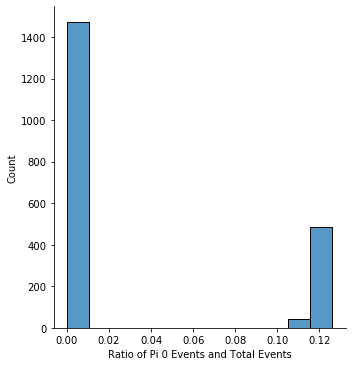

In [18]:
sns.displot(Ratio)
plt.xlabel('Ratio of Pi 0 Events and Total Events')

In [21]:
f=h5py.File('/home/c479r989/research_repo/data-preprocess/ND_MC_Nominal_Files_FHC_mominkhan/neardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00010582_s17_c005_R19-11-18-prod5reco.x_v1_20191024_022032_sim.h5caf.h5')
f.keys()

/opt/software/software/IPython/7.9.0-foss-2019b-Python-3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


<KeysViewHDF5 ['MetaData', 'neutrino', 'neutrino.beam', 'neutrino.genVersion', 'neutrino.michel', 'neutrino.prim', 'neutrino.prim.daughterEnergies', 'neutrino.prim.daughterlist', 'neutrino.rwgt.genie', 'neutrino.rwgt.ppfx', 'neutrino.rwgt.ppfx.vuniv', 'rec.energy.nue', 'rec.energy.nue.lid', 'rec.energy.numu', 'rec.energy.numu.bpfenergy', 'rec.energy.numu.hadclust', 'rec.energy.numu.mc', 'rec.hdr', 'rec.mc', 'rec.mc.allcosmics', 'rec.mc.allcosmics.michel', 'rec.mc.allnus', 'rec.mc.allnus.beam', 'rec.mc.allnus.genVersion', 'rec.mc.allnus.michel', 'rec.mc.allnus.prim', 'rec.mc.allnus.prim.daughterEnergies', 'rec.mc.allnus.prim.daughterlist', 'rec.mc.allnus.rwgt.genie', 'rec.mc.allnus.rwgt.ppfx', 'rec.mc.allnus.rwgt.ppfx.vuniv', 'rec.mc.cosmic', 'rec.mc.cosmic.michel', 'rec.mc.global', 'rec.mc.nu', 'rec.mc.nu.beam', 'rec.mc.nu.genVersion', 'rec.mc.nu.michel', 'rec.mc.nu.prim', 'rec.mc.nu.prim.daughterEnergies', 'rec.mc.nu.prim.daughterlist', 'rec.mc.nu.rwgt.genie', 'rec.mc.nu.rwgt.ppfx', '

In [23]:
x=f['rec.mc.nu.prim']['p.E'][:]

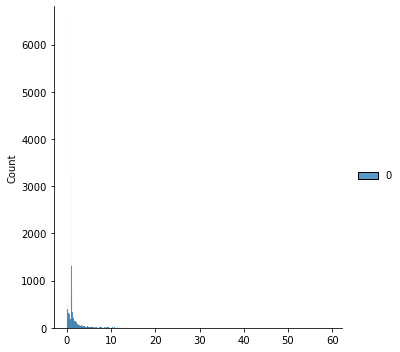

In [27]:
sns.displot(x)

In [51]:
x=f['rec.mc.nu.prim']['p.px'][:]
y=f['rec.mc.nu.prim']['p.py'][:]
z=f['rec.mc.nu.prim']['p.pz'][:]

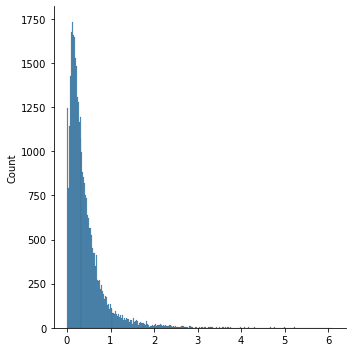

In [53]:
a=0
xnew=numpy.zeros(len(x))
for w in x:
    xnew[a]=w*w
    a=a+1


b=0
ynew=numpy.zeros(len(y))
for a in y:
    ynew[b]=a*a
    b=b+1


c=0
znew=numpy.zeros(len(z))
for a in z:
    znew[c]=a*a
    b=b+1


ptotal=numpy.sqrt(xnew+ynew+znew)
sns.displot(ptotal)